In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def plot_actions(scene_name, data, history=3, plot_start=None, plot_end=None):
    for entry in data:
        if entry['scene'] == scene_name:
            
            action_gt = np.array(entry['action_gt'])
            action_hat = np.array(entry['action_pred'])[: len(action_gt)]
            action_his = np.array(entry['action_his'])[:history]
            frames = range(1, len(action_his) + len(action_hat)+1)

            print(len(action_hat), len(action_gt), len(action_his))
            

            plt.figure(figsize=(10, 5))
            
            action_hat = np.concatenate([action_his, action_hat], axis=0)
            action_gt = np.concatenate([action_his, action_gt], axis=0)

            if plot_start is not None and plot_end is not None:
                print('pred: ', action_hat[plot_start+1:plot_end+1, 0])
                print('gt  : ', action_gt[plot_start+1:plot_end+1, 0])
                print('pred: ', action_hat[plot_start+1:plot_end+1, 1])
                print('gt  : ', action_gt[plot_start+1:plot_end+1, 1])

            # Plot Action Hat
            plt.plot(frames, action_hat[:, 0], 'o--', label='Pred Steer', color='b', markerfacecolor='none')
            plt.plot(frames, action_gt[:, 0], 'o-', label='GT Steer', color='b', markerfacecolor='none')
            
            plt.plot(frames, action_hat[:, 1], '^--', label='Pred Speed', color='r', markerfacecolor='none')
            plt.plot(frames, action_gt[:, 1], '^-', label='GT Speed', color='r', markerfacecolor='none')

            for i in range(8, len(action_gt), 4):
                plt.axvline(x=i, color='r', linestyle='--')

            # plt.ylim(None, 3)
            plt.xlabel('Frame')
            plt.ylabel('Action Value')
            plt.title(f'Action Comparison for Scene {scene_name}')
            plt.legend()
            plt.grid(True)
            plt.show()
            return
    print(f"No data found for scene {scene_name}")
def plot_actions_1(scene_name, data):
    for entry in data:
        if entry['scene'] == scene_name:
            action_hat = np.array(entry['action_hat'])
            action_gt = np.array(entry['action_gt'])
            action_his = np.array(entry['action_his'])
            frames = range(1, len(action_his) + len(action_hat)+1)

            plt.figure(figsize=(10, 5))

            action_hat = np.concatenate([action_his, action_hat], axis=0)
            action_gt = np.concatenate([action_his, action_gt], axis=0)

            # Plot Action Hat
            plt.plot(frames, action_hat[:, 0], 'o--', label='Pred Steer', color='b', markerfacecolor='none')
            plt.plot(frames, action_gt[:, 0], 'o-', label='GT Steer', color='b', markerfacecolor='none')
            
            plt.plot(frames, action_hat[:, 1], '^--', label='Pred Speed', color='r', markerfacecolor='none')
            plt.plot(frames, action_gt[:, 1], '^-', label='GT Speed', color='r', markerfacecolor='none')

            # plt.ylim(None, 3)
            plt.xlabel('Frame')
            plt.ylabel('Action Value')
            plt.title(f'Action Comparison for Scene {scene_name}')
            plt.legend()
            plt.grid(True)
            plt.show()
            return
    print(f"No data found for scene {scene_name}")

In [98]:

with open(r'C:\Users\wangxiaodong\Downloads\action_eval_llama-decomp_0.5k.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_hat = np.array(item['action_pred'])
    action_gt = np.array(item['action_gt'])
    l1_steers_dis.append(np.abs(action_hat[:2, 0] - action_gt[:2, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:2, 1] - action_gt[:2, 1]))

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')

l1 steer: 0.17731985994887509
l1 speed: 0.12325711119920016
avg dis: 0.15028848557403762


In [134]:

with open(r'C:\Users\wangxiaodong\Downloads\action_eval_llama_ctx3.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_hat = np.array(item['action_pred'])
    action_gt = np.array(item['action_gt'])
    l1_steers_dis.append(np.abs(action_hat[:1, 0] - action_gt[:1, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:1, 1] - action_gt[:1, 1]))

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

l1 steer: 0.674366488144733
l1 speed: 1.4625246792534987
avg dis: 1.0684455836991158
150


In [200]:
with open(r'C:\Users\wangxiaodong\Downloads\action_h3_ms16_ctx3_20k.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    l1_steers_dis.append(np.abs(action_hat[:, 0] - action_gt[:, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:, 1] - action_gt[:, 1]))
    # print(np.abs(action_hat[:, 1] - action_gt[:, 1]).mean())
print(len(action_hat))
m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

33
l1 steer: 0.10709383974914108
l1 speed: 0.08854961839984313
avg dis: 0.0978217290744921
150


In [199]:
with open(r'C:\Users\wangxiaodong\Downloads\action_h8_ms16_ctx8_20k.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    l1_steers_dis.append(np.abs(action_hat[:, 0] - action_gt[:, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:, 1] - action_gt[:, 1]))
    # print(np.abs(action_hat[:, 1] - action_gt[:, 1]).mean())
print(len(action_hat))

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

28
l1 steer: 0.10037135423864237
l1 speed: 0.088269191910291
avg dis: 0.09432027307446669
150


In [123]:
with open(r'C:\Users\wangxiaodong\Downloads\action_h8_ms16_ctx8_scope4_20k.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    l1_steers_dis.append(np.abs(action_hat[:, 0] - action_gt[:, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:, 1] - action_gt[:, 1]))

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

l1 steer: 0.20539251616768195
l1 speed: 0.3491910032990078
avg dis: 0.27729175973334486
150


In [128]:
with open(r'C:\Users\wangxiaodong\Downloads\action_h8_ms16_ctx8_scope4_20k.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    l1_steers_dis.append(np.abs(action_hat[:4, 0] - action_gt[:4, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:4, 1] - action_gt[:4, 1]))

print(len(l1_steers_dis[0]))

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

4
l1 steer: 0.17867460985688619
l1 speed: 0.32009665979693336
avg dis: 0.24938563482690979
150


In [207]:
with open(r'C:\Users\wangxiaodong\Downloads\action_h3_ms16_ctx3_scope4_20k.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    l1_steers_dis.append(np.abs(action_hat[:, 0] - action_gt[:, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:, 1] - action_gt[:, 1]))

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

l1 steer: 0.2621538284526463
l1 speed: 0.3968431458593995
avg dis: 0.3294984871560229
150


In [211]:
with open(r'C:\Users\wangxiaodong\Downloads\action_h8_ms16_4gram_10k.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    l1_steers_dis.append(np.abs(action_hat[:, 0] - action_gt[:, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:, 1] - action_gt[:, 1]))

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

l1 steer: 0.24918670140033036
l1 speed: 0.2893063955933654
avg dis: 0.26924654849684787
150


In [3]:
## NOTE最好的结果？？？ 有点差
with open(r'C:\Users\wangxiaodong\Downloads\action_h8_ms16_4gram_20k.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    l1_steers_dis.append(np.abs(action_hat[:, 0] - action_gt[:, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:, 1] - action_gt[:, 1]))

print(l1_speeds_dis[0].shape)

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

(28,)
l1 steer: 0.2074955650467986
l1 speed: 0.26706781647622674
avg dis: 0.23728169076151268
150


In [96]:
## NOTE最好的结果？？？ 有点差
with open(r'C:\Users\wangxiaodong\Downloads\action_h8_ms16_4gram_20k.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    l1_steers_dis.append(np.abs(action_hat[:, 0] - action_gt[:, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:, 1] - action_gt[:, 1]))

print(l1_speeds_dis[0].shape)

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

(28,)
l1 steer: 0.2074955650467986
l1 speed: 0.26706781647622674
avg dis: 0.23728169076151268
150


In [9]:
## Ablation
with open(r'C:\Users\wangxiaodong\Downloads\action-llama-1e-4-v8_bs8_layer6_h8_ms16_4gram_eval_scope4\preview_1step_scope_4\action_val.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    l1_steers_dis.append(np.abs(action_hat[:, 0] - action_gt[:, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:, 1] - action_gt[:, 1]))

print(l1_speeds_dis[0].shape)

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

(28,)
l1 steer: 0.22404736393783575
l1 speed: 0.27787183290558115
avg dis: 0.25095959842170845
150


In [8]:
## Ablation
with open(r'C:\Users\wangxiaodong\Downloads\action-llama-1e-4-v8_bs8_layer4_h8_ms16_4gram_eval_scope4\preview_1step_scope_4\action_val.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    l1_steers_dis.append(np.abs(action_hat[:, 0] - action_gt[:, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:, 1] - action_gt[:, 1]))

print(l1_speeds_dis[0].shape)

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

(28,)
l1 steer: 0.226912333108365
l1 speed: 0.29851260172424926
avg dis: 0.26271246741630716
150


In [145]:
with open(r'C:\Users\wangxiaodong\Downloads\action-mmllama-1e-4-v8_bs4_h8_ms16_4gram_sequence_clip_pooler_copy1_last_1_layer_eval_scope4\preview_1step\action_val.json', 'r') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    l1_steers_dis.append(np.abs(action_hat[:, 0] - action_gt[:, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:, 1] - action_gt[:, 1]))

print(l1_speeds_dis[0].shape)

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

(28,)
l1 steer: 0.22066605112212767
l1 speed: 0.30601064056712424
avg dis: 0.26333834584462595
150


In [118]:

with open(r'C:\Users\wangxiaodong\Downloads\action-mmllama-1e-4-v8_bs4_h8_ms16_4gram_last_layers_sequence-clip-pooler_copy4-scope4-val36-enable-sequence\preview_1step\action_val.json', 'r') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    l1_steers_dis.append(np.abs(action_hat[:1, 0] - action_gt[:1, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:1, 1] - action_gt[:1, 1]))

print(l1_speeds_dis[0].shape)

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

(1,)
l1 steer: 0.09935521812018124
l1 speed: 0.08683980921904245
avg dis: 0.09309751366961184
150


In [7]:
import json
import numpy as np
with open(r'action-mmllama-1e-4-v8_bs4_h8_ms16_4gram_sequence_clip_pooler_copy1_last_1_layer_eval_scope1\preview_1step\action_val.json', 'r') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    l1_steers_dis.append(np.abs(action_hat[:, 0] - action_gt[:, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:, 1] - action_gt[:, 1]))

print(l1_speeds_dis[0].shape)

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

(28,)
l1 steer: 0.12308575833666574
l1 speed: 0.12729823423704753
avg dis: 0.12519199628685662
150


28 28 8
pred:  [-0.85373354 -0.86411428 -2.68559766 -3.05478835]
gt  :  [-1.72382426 -2.23381543 -2.84945989 -2.91418862]
pred:  [1.90454137 1.71661413 1.27963912 0.85762751]
gt  :  [2.05979013 1.66878557 1.11101878 0.51377159]


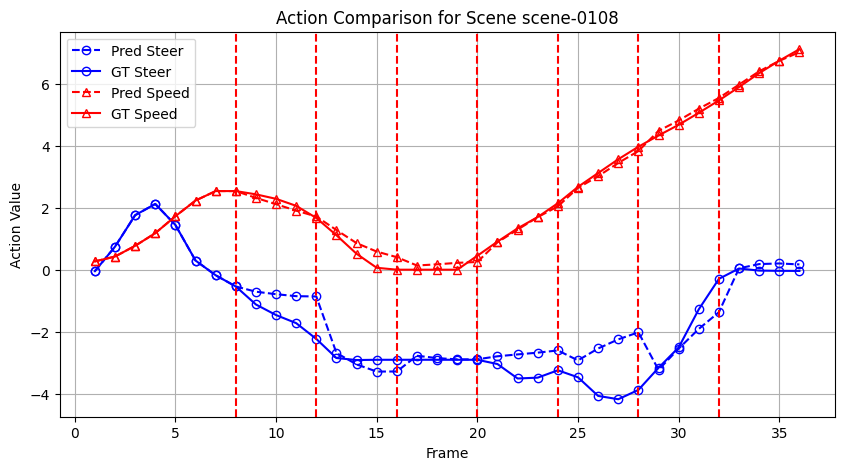

In [2]:
## 可视化
# 柱状图或折线图
with open(r'C:\Users\wangxiaodong\Downloads\action_h8_ms16_4gram_20k.json') as f:
    data = json.load(f)
plot_actions('scene-0108', data, history=8, plot_start=9, plot_end=13)

In [2]:
with open(r'C:\Users\wangxiaodong\Downloads\action_h3_ms8_4gram_20k.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    l1_steers_dis.append(np.abs(action_hat[:, 0] - action_gt[:, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:, 1] - action_gt[:, 1]))

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

l1 steer: 0.22386810593776188
l1 speed: 0.27007493331313437
avg dis: 0.2469715196254481
150


In [38]:
# 标准计算，每帧都进行计算
with open(r'C:\Users\wangxiaodong\Downloads\action_h3_ms8_4gram_scope1_20k.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    l1_steers_dis.append(np.abs(action_hat[:, 0] - action_gt[:, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:, 1] - action_gt[:, 1]))

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

l1 steer: 0.10802987458028387
l1 speed: 0.10859583809388557
avg dis: 0.10831285633708472
150


In [95]:
# 标准计算，每帧都进行计算
with open(r'C:\Users\wangxiaodong\Downloads\action_h3_ms8_4gram_scope1_20k.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    l1_steers_dis.append(np.abs(action_hat[:16, 0] - action_gt[:16, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:16, 1] - action_gt[:16, 1]))

print(l1_speeds_dis[0].shape)

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

(16,)
l1 steer: 0.11165214879341269
l1 speed: 0.10957461308629718
avg dis: 0.11061338093985493
150


In [59]:
with open(r'C:\Users\wangxiaodong\Downloads\action_h3_ms8_4gram_scope1_20k.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    l1_steers_dis.append(np.abs(action_hat[:, 0] - action_gt[:, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:, 1] - action_gt[:, 1]))

m1 = calculate_mean_for_arrays(l1_steers_dis, 0.07)
m2 = calculate_mean_for_arrays(l1_speeds_dis, 0.07)
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

l1 steer: 0.6408080808080808
l1 speed: 0.4527272727272727
avg dis: 0.5467676767676768
150


In [32]:
with open(r'C:\Users\wangxiaodong\Downloads\action_h4_ms8_4gram_scope1_20k.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    l1_steers_dis.append(np.abs(action_hat[:, 0] - action_gt[:, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:, 1] - action_gt[:, 1]))

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

l1 steer: 0.1142537013079389
l1 speed: 0.11155433974422825
avg dis: 0.11290402052608357
150


In [33]:
with open(r'C:\Users\wangxiaodong\Downloads\action_h4_ms8_4gram_scope4_20k.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    l1_steers_dis.append(np.abs(action_hat[:, 0] - action_gt[:, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:, 1] - action_gt[:, 1]))

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

l1 steer: 0.2587837931389017
l1 speed: 0.30425772412505464
avg dis: 0.2815207586319782
150


In [8]:
with open(r'C:\Users\wangxiaodong\Downloads\action-llama-1e-4-v8_bs_hs12_ms24_4gram_fixloss_eval_scope1\preview_1step_scope_1\action_val.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    l1_steers_dis.append(np.abs(action_hat[:, 0] - action_gt[:, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:, 1] - action_gt[:, 1]))

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

l1 steer: 0.10606200336774363
l1 speed: 0.12200878215032086
avg dis: 0.11403539275903224
150


In [14]:
with open(r'C:\Users\wangxiaodong\Downloads\action-mmllama-1e-4-v8_bs8_h8_ms16_4gram_run1_scope1_last\preview_1step\action_train.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    l1_steers_dis.append(np.abs(action_hat[:, 0] - action_gt[:, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:, 1] - action_gt[:, 1]))

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

l1 steer: 0.1353802112801835
l1 speed: 0.076599499329173
avg dis: 0.10598985530467825
684


In [32]:
with open(r'C:\Users\wangxiaodong\Downloads\action-mmllama-1e-4-v8_bs4_h8_ms16_4gram_clip_short_eval_scope1\preview_1step\action_val.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    l1_steers_dis.append(np.abs(action_hat[:, 0] - action_gt[:, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:, 1] - action_gt[:, 1]))


m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

l1 steer: 0.19123592527420746
l1 speed: 0.26896097370190547
avg dis: 0.23009844948805647
150


In [119]:
with open(r'C:\Users\wangxiaodong\Downloads\action-mmllama-1e-4-v8_bs4_h8_ms16_4gram_last_layers_sequence-clip-pooler_copy4-scope1-val36-enable-sequence\preview_1step\action_val.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    
    l1_steers_dis.append(np.abs(action_hat[:1, 0] - action_gt[:1, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:1, 1] - action_gt[:1, 1]))
print(len(action_hat))

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

28
l1 steer: 0.09935521812018124
l1 speed: 0.08683980921904245
avg dis: 0.09309751366961184
150


In [120]:
with open(r'C:\Users\wangxiaodong\Downloads\action-mmllama-1e-4-v8_bs4_h8_ms16_4gram_last_layers_sequence-clip-pooler_copy4-scope4-val36-enable-sequence\preview_1step\action_val.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    
    l1_steers_dis.append(np.abs(action_hat[:1, 0] - action_gt[:1, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:1, 1] - action_gt[:1, 1]))
print(len(action_hat))

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

28
l1 steer: 0.09935521812018124
l1 speed: 0.08683980921904245
avg dis: 0.09309751366961184
150


In [122]:
# 指标呢
with open(r'C:\Users\wangxiaodong\Downloads\action-mmllama-1e-4-v8_bs4_h8_ms16_4gram_t100_run1_scope4\preview_1step\action_val.json') as f:
    data = json.load(f)
l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    l1_steers_dis.append(np.abs(action_hat[:4, 0] - action_gt[:4, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:4, 1] - action_gt[:4, 1]))

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

l1 steer: 0.22497970904878456
l1 speed: 0.290077592030478
avg dis: 0.25752865053963125
150


8 8 8
pred:  [-1.73556197 -1.98421705 -2.65236259 -3.59802151]
gt  :  [-1.72382426 -2.23381543 -2.84945989 -2.91418862]
pred:  [2.24889112 1.81955183 1.20475256 0.79936182]
gt  :  [2.05979013 1.66878557 1.11101878 0.51377159]


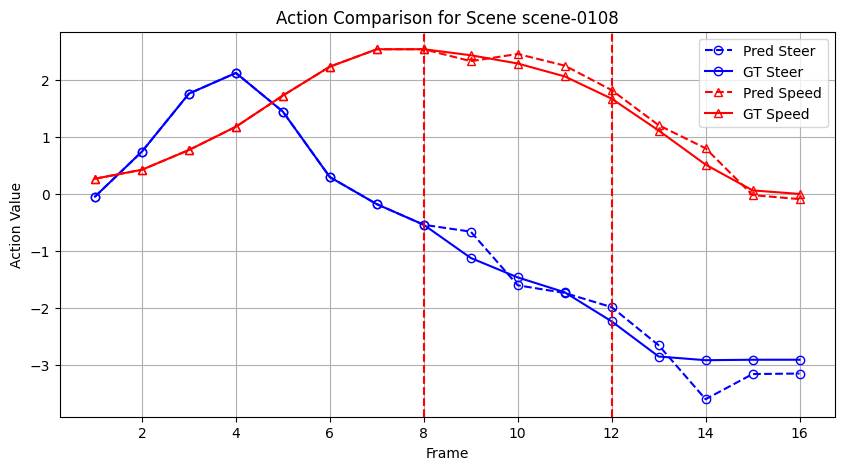

In [25]:
# 柱状图或折线图
with open(r'C:\Users\wangxiaodong\Downloads\action-mmllama-1e-4-v8_bs4_h8_ms16_4gram_t100_run1_scope1\preview_1step\action_val.json') as f:
    data = json.load(f)
plot_actions('scene-0108', data, history=8, plot_start=9, plot_end=13)

8 8 8
pred:  [-0.65326339 -0.54554874 -2.67666602 -2.63596749]
gt  :  [-1.72382426 -2.23381543 -2.84945989 -2.91418862]
pred:  [2.3742609  2.37788105 1.19778728 1.04738414]
gt  :  [2.05979013 1.66878557 1.11101878 0.51377159]


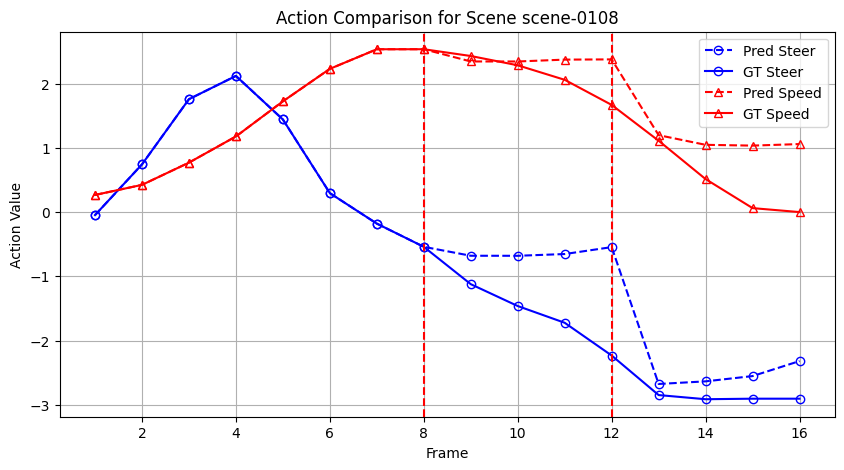

In [26]:
# 柱状图或折线图
with open(r'C:\Users\wangxiaodong\Downloads\action-mmllama-1e-4-v8_bs4_h8_ms16_4gram_t100_run1_scope4\preview_1step\action_val.json') as f:
    data = json.load(f)
plot_actions('scene-0108', data, history=8, plot_start=9, plot_end=13)

33 33 3
[-1.79893577 -1.96341646 -2.51358294 -3.05175066]
[-1.72382426 -2.23381543 -2.84945989 -2.91418862]
[2.03574586 1.64608955 0.89481968 0.33383551]
[2.05979013 1.66878557 1.11101878 0.51377159]


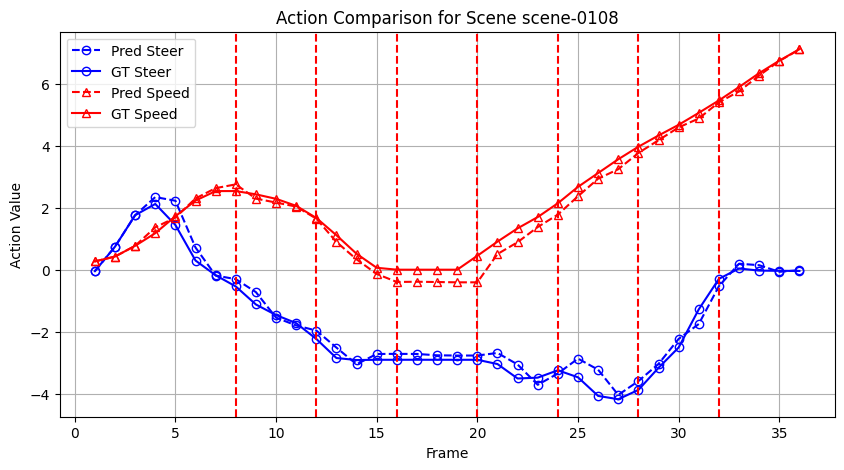

In [9]:
# 柱状图或折线图
with open(r'C:\Users\wangxiaodong\Downloads\action_h3_ms8_4gram_scope1_20k.json') as f:
    data = json.load(f)
plot_actions('scene-0108', data, history=3, plot_start=9, plot_end=13)

In [34]:
# 指标呢
with open(r'C:\Users\wangxiaodong\Downloads\action-llama-1e-4-v2_bs32_h8_ms16_4gram_eval_scope36\preview_1step_scope_36\action_val.json') as f:
    data = json.load(f)
l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    l1_steers_dis.append(np.abs(action_hat[:, 0] - action_gt[:, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:, 1] - action_gt[:, 1]))

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

l1 steer: 0.4369889933366979
l1 speed: 1.708432869600864
avg dis: 1.0727109314687808
150


28 28 8
pred:  [-0.85373354 -0.86411428 -0.88416797 -0.91340423]
gt  :  [-1.72382426 -2.23381543 -2.84945989 -2.91418862]
pred:  [1.90454137 1.71661413 1.57784367 1.41792548]
gt  :  [2.05979013 1.66878557 1.11101878 0.51377159]


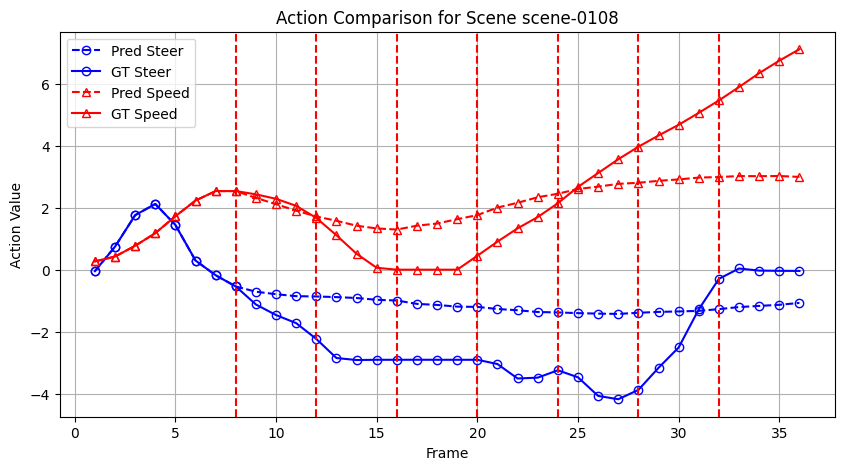

In [35]:
# 柱状图或折线图
with open(r'C:\Users\wangxiaodong\Downloads\action-llama-1e-4-v2_bs32_h8_ms16_4gram_eval_scope36\preview_1step_scope_36\action_val.json') as f:
    data = json.load(f)
plot_actions('scene-0108', data, history=8, plot_start=9, plot_end=13)

33 33 3
pred:  [1.01538038 0.4836385  0.28872019 0.07385982]
gt  :  [-1.72382426 -2.23381543 -2.84945989 -2.91418862]
pred:  [4.12203884 4.55705976 4.74009609 4.98539019]
gt  :  [2.05979013 1.66878557 1.11101878 0.51377159]


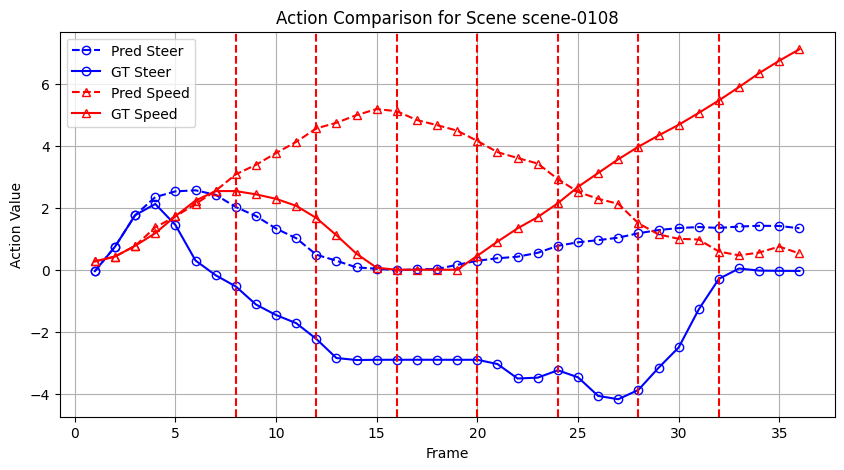

In [3]:
# 柱状图或折线图
with open(r'C:\Users\wangxiaodong\Downloads\action-llama-1e-4-v8_bs8_h3_ms8_4gram_scope36\preview_1step_scope_36\action_val.json') as f:
    data = json.load(f)
plot_actions('scene-0108', data, history=3, plot_start=9, plot_end=13)

28 28 8
pred:  [3.4580307  3.25379086 3.02178383 2.8802948 ]
gt  :  [3.12538218 2.72826147 1.74432695 1.52112651]
pred:  [1.90279174 1.83798945 1.83329773 1.78312457]
gt  :  [1.5430907  1.17932189 0.78003532 0.38541368]


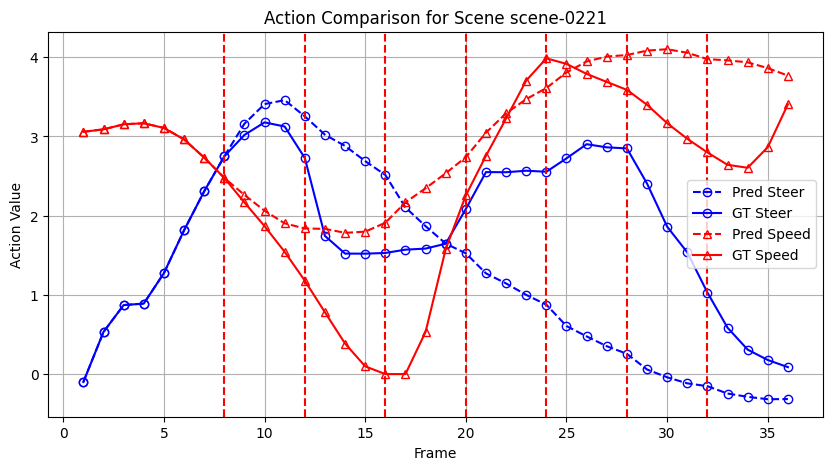

In [36]:
# 柱状图或折线图
with open(r'C:\Users\wangxiaodong\Downloads\action-llama-1e-4-v2_bs32_h8_ms16_4gram_eval_scope36\preview_1step_scope_36\action_val.json') as f:
    data = json.load(f)
plot_actions('scene-0221', data, history=8, plot_start=9, plot_end=13)

33 33 3
pred:  [1.49949503 2.5193181  3.04910898 2.39472699]
gt  :  [2.08503103 2.54992604 2.54818082 2.56737924]
pred:  [2.56906009 3.16787386 3.48759699 3.84775949]
gt  :  [2.25617933 2.75579119 3.22732186 3.70573497]


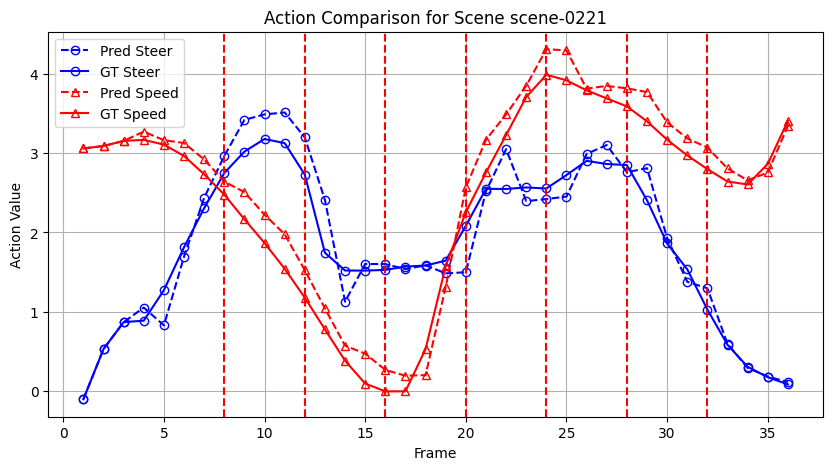

In [18]:
# 柱状图或折线图
with open(r'C:\Users\wangxiaodong\Downloads\action_h3_ms8_4gram_scope1_20k.json') as f:
    data = json.load(f)
plot_actions('scene-0221', data, history=3, plot_start=18, plot_end=22)

In [3]:
with open(r'C:\Users\wangxiaodong\Downloads\mm-action_h3_ms7_4gram_scope1_20k.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    l1_steers_dis.append(np.abs(action_hat[:, 0] - action_gt[:, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:, 1] - action_gt[:, 1]))

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

l1 steer: 0.1368477386583366
l1 speed: 0.08273780709809878
avg dis: 0.10979277287821769
150


In [97]:
# 所有帧参与计算
with open(r'C:\Users\wangxiaodong\Downloads\action_h8_ms16_4gram_scope1_20k.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    l1_steers_dis.append(np.abs(action_hat[:, 0] - action_gt[:, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:, 1] - action_gt[:, 1]))

print(l1_speeds_dis[0].shape)

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

(28,)
l1 steer: 0.09501662152169155
l1 speed: 0.08919345226249702
avg dis: 0.09210503689209429
150


In [62]:
# 所有帧参与计算
with open(r'C:\Users\wangxiaodong\Downloads\action_h8_ms16_4gram_scope1_20k.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    l1_steers_dis.append(np.abs(action_hat[:16, 0] - action_gt[:16, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:16, 1] - action_gt[:16, 1]))

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

l1 steer: 0.09591705040026834
l1 speed: 0.09039973015373107
avg dis: 0.09315839027699971
150


In [64]:
# 所有帧参与计算
with open(r'C:\Users\wangxiaodong\Downloads\action_h8_ms16_4gram_scope1_20k.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    l1_steers_dis.append(np.abs(action_hat[:16, 0] - action_gt[:16, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:16, 1] - action_gt[:16, 1]))

m1 = calculate_mean_for_arrays(l1_steers_dis, 0.07)
m2 = calculate_mean_for_arrays(l1_speeds_dis, 0.07)
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

l1 steer: 0.715
l1 speed: 0.44458333333333333
avg dis: 0.5797916666666667
150


In [45]:
def calculate_mean_for_arrays(arrays, thresh=0.01):
    # 初始化一个空列表，用于存储转换后的0和1
    binary_values = []
    
    # 遍历每个np.array数组
    for array in arrays:
        # 对数组中的每个值进行转换
        binary_array = np.where(array <= thresh, 1, 0)
        # 将转换后的数组展平并添加到binary_values列表中
        binary_values.extend(binary_array.flatten())
    
    # 计算均值
    mean_value = np.mean(binary_values)
    return mean_value

In [55]:
# 计算不同阈值的值
with open(r'C:\Users\wangxiaodong\Downloads\action_h8_ms16_4gram_scope1_20k.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    l1_steers_dis.append(np.abs(action_hat[:, 0] - action_gt[:, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:, 1] - action_gt[:, 1]))

m1 = calculate_mean_for_arrays(l1_steers_dis, 0.01)
m2 = calculate_mean_for_arrays(l1_speeds_dis, 0.01)
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(len(data))

l1 steer: 0.21476190476190476
l1 speed: 0.0719047619047619
150


28 28 8
pred:  [-2.92532229 -3.37654734 -4.15638542 -3.82929087]
gt  :  [-3.47156739 -4.07152605 -4.17824602 -3.87772179]
pred:  [2.63802814 3.31572318 3.66016912 4.09669352]
gt  :  [2.67124581 3.11776733 3.56212521 3.9661653 ]


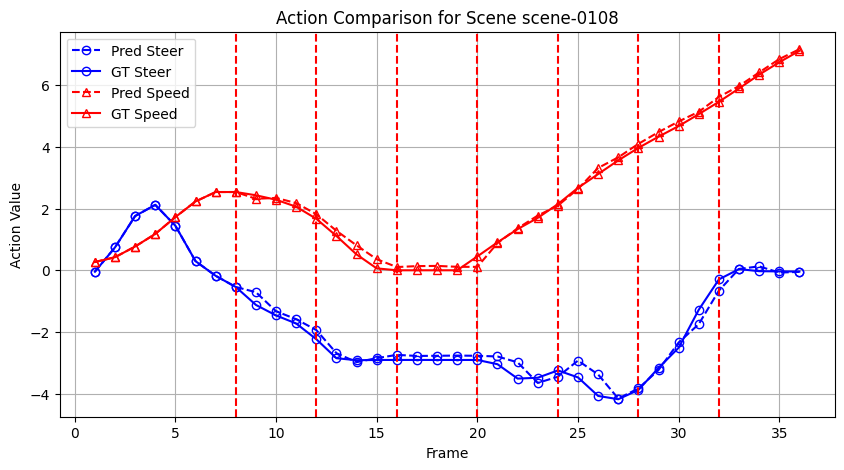

In [37]:
# 柱状图或折线图
with open(r'C:\Users\wangxiaodong\Downloads\action_h8_ms16_4gram_scope1_20k.json') as f:
    data = json.load(f)
plot_actions('scene-0108', data, history=8, plot_start=23, plot_end=27)

28 28 8
pred:  [-2.92532229 -3.37654734 -4.15638542 -3.82929087]
gt  :  [-3.47156739 -4.07152605 -4.17824602 -3.87772179]
pred:  [2.63802814 3.31572318 3.66016912 4.09669352]
gt  :  [2.67124581 3.11776733 3.56212521 3.9661653 ]


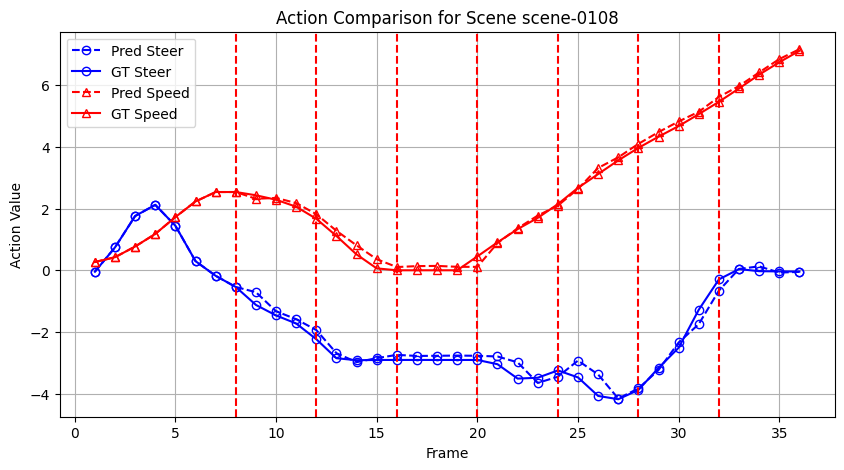

In [11]:
# 柱状图或折线图
with open(r'C:\Users\wangxiaodong\Downloads\action_h8_ms16_4gram_scope1_20k.json') as f:
    data = json.load(f)
plot_actions('scene-0108', data, history=8, plot_start=23, plot_end=27)

## Last checkpoint不一定最好

In [35]:
with open(r'C:\Users\wangxiaodong\Downloads\action-llama-1e-4-v2_bs32_h8_ms16_4gram_his4_scope1\preview_1step_scope_1\action_val.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_gt = np.array(item['action_gt'])
    action_hat = np.array(item['action_pred'])[:len(action_gt)]
    l1_steers_dis.append(np.abs(action_hat[:, 0] - action_gt[:, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:, 1] - action_gt[:, 1]))

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

l1 steer: 0.10064119528465786
l1 speed: 0.09600893096008804
avg dis: 0.09832506312237295
150


32 32 8
pred:  [-3.1604948  -3.39288044 -4.12760115 -3.65077853]
gt  :  [-3.04339623 -3.50978518 -3.48227406 -3.24449515]
pred:  [1.16206026 1.48933542 2.01063704 2.2765069 ]
gt  :  [0.90530246 1.33383453 1.6977973  2.14379382]


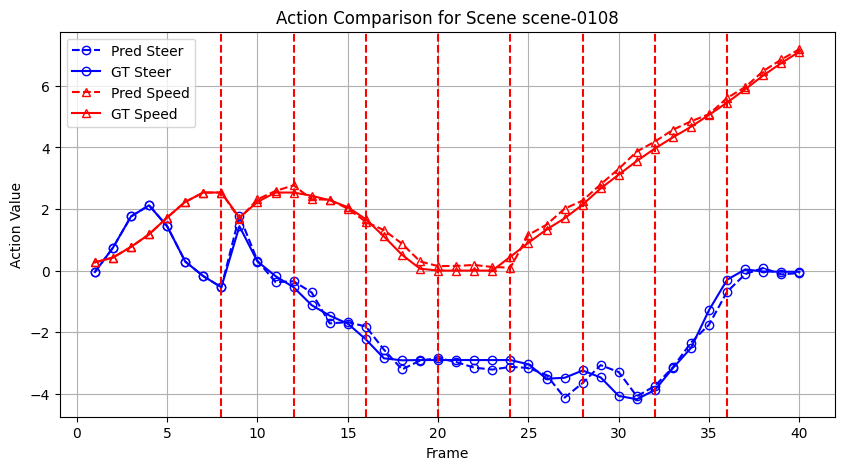

In [36]:
## 可视化
# 柱状图或折线图
with open(r'C:\Users\wangxiaodong\Downloads\action-llama-1e-4-v2_bs32_h8_ms16_4gram_his4_scope1\preview_1step_scope_1\action_val.json') as f:
    data = json.load(f)
plot_actions('scene-0108', data, history=8, plot_start=23, plot_end=27)

In [122]:
with open(r'C:\Users\wangxiaodong\Downloads\action_eval_llama_1k.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_hat = np.array(item['action_pred'])
    action_gt = np.array(item['action_gt'])
    l1_steers_dis.append(np.abs(action_hat[:4, 0] - action_gt[:4, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:4, 1] - action_gt[:4, 1]))

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

l1 steer: 0.1209957649194621
l1 speed: 0.23942992743104696
avg dis: 0.18021284617525452
20


In [157]:
with open(r'C:\Users\wangxiaodong\Downloads\action_eval_llama_1.5k.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_hat = np.array(item['action_pred'])
    action_gt = np.array(item['action_gt'])
    l1_steers_dis.append(np.abs(action_hat[:1, 0] - action_gt[:1, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:1, 1] - action_gt[:1, 1]))

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

l1 steer: 0.10006484306257335
l1 speed: 0.05687229280670484
avg dis: 0.07846856793463909
150


In [149]:
with open(r'C:\Users\wangxiaodong\Downloads\action_eval_llama_ctx3_15k.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_hat = np.array(item['action_pred'])
    action_gt = np.array(item['action_gt'])
    l1_steers_dis.append(np.abs(action_hat[:1, 0] - action_gt[:1, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:1, 1] - action_gt[:1, 1]))

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

l1 steer: 0.08531721305257331
l1 speed: 0.1289418863753478
avg dis: 0.10712954971396055
150


In [161]:
with open(r'C:\Users\wangxiaodong\Downloads\action_eval_llama_ctx3_20k.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_hat = np.array(item['action_pred'])
    action_gt = np.array(item['action_gt'])
    l1_steers_dis.append(np.abs(action_hat[:, 0] - action_gt[:, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:, 1] - action_gt[:, 1]))

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
l1 steer: 0.10313706961759368
l1 speed: 0.10210913440212607
avg dis: 0.10262310200985988
150


In [158]:
with open(r'C:\Users\wangxiaodong\Downloads\action_eval_llama_ctx4_20k.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_hat = np.array(item['action_pred'])
    action_gt = np.array(item['action_gt'])
    l1_steers_dis.append(np.abs(action_hat[:, 0] - action_gt[:, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:, 1] - action_gt[:, 1]))

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

l1 steer: 0.11072083380996275
l1 speed: 0.23260197154110454
avg dis: 0.17166140267553365
150


In [159]:
with open(r'C:\Users\wangxiaodong\Downloads\action_eval_llama_ctx8_20k.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_hat = np.array(item['action_pred'])
    action_gt = np.array(item['action_gt'])
    l1_steers_dis.append(np.abs(action_hat[:, 0] - action_gt[:, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:, 1] - action_gt[:, 1]))

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')
print(len(data))

l1 steer: 0.1288540527193373
l1 speed: 0.07222037863984172
avg dis: 0.10053721567958951
150


In [148]:
with open(r'C:\Users\wangxiaodong\Downloads\action_pureGRU.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_hat = np.array(item['action_pred'])
    action_gt = np.array(item['action_gt'])
    l1_steers_dis.append(np.abs(action_hat[:1, 0] - action_gt[:1, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:1, 1] - action_gt[:1, 1]))

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')

l1 steer: 0.09413980373642214
l1 speed: 0.06289060834174355
avg dis: 0.07851520603908285


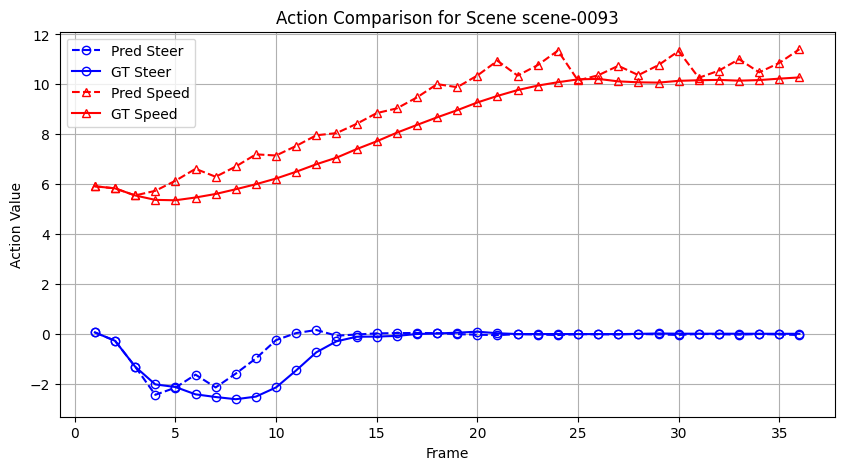

In [164]:
with open(r'C:\Users\wangxiaodong\Downloads\action_eval_llama_ctx3_20k_scope3.json') as f:
    data = json.load(f)

plot_actions('scene-0093', data, history=3)

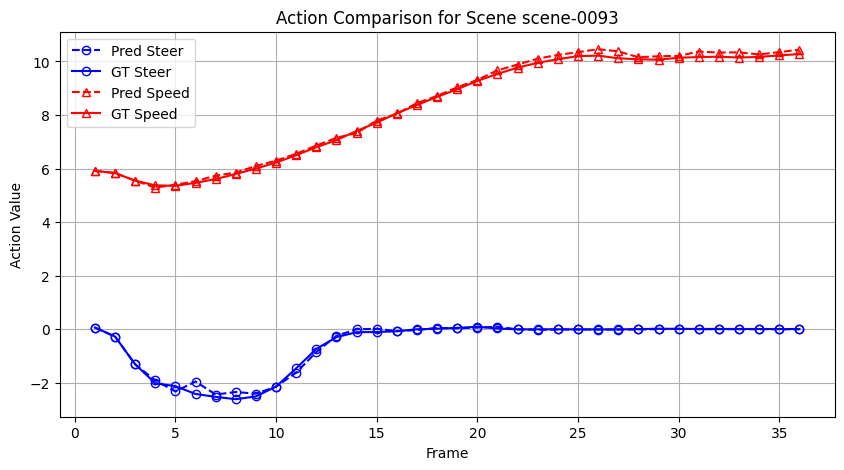

In [163]:
with open(r'C:\Users\wangxiaodong\Downloads\action_eval_llama_ctx3_20k.json') as f:
    data = json.load(f)

plot_actions('scene-0093', data, history=3)

33 33 3


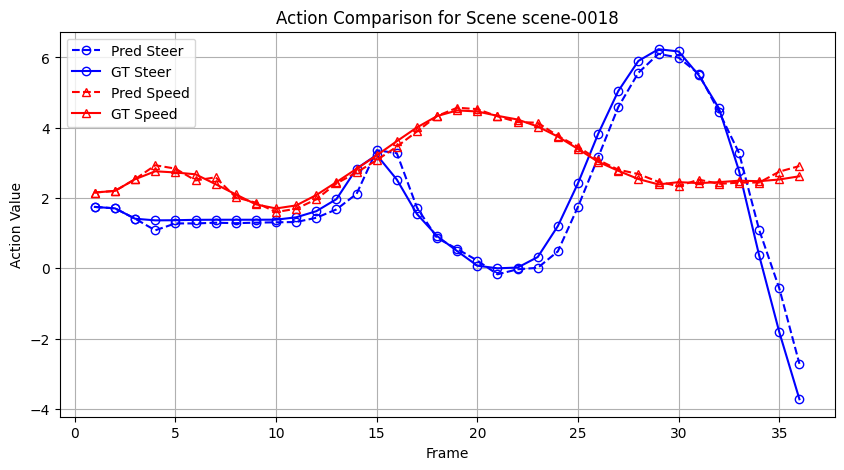

In [192]:
with open(r'C:\Users\wangxiaodong\Downloads\action_h3_ms16_ctx3_20k.json') as f:
    data = json.load(f)

plot_actions('scene-0018', data, history=3)

28 28 8


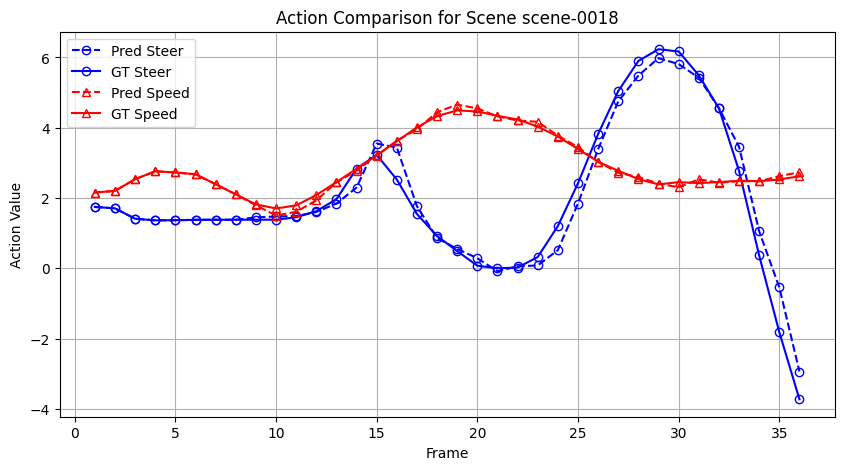

In [204]:
with open(r'C:\Users\wangxiaodong\Downloads\action_h8_ms16_ctx8_20k.json') as f:
    data = json.load(f)

plot_actions('scene-0018', data, history=8)

33 33 3


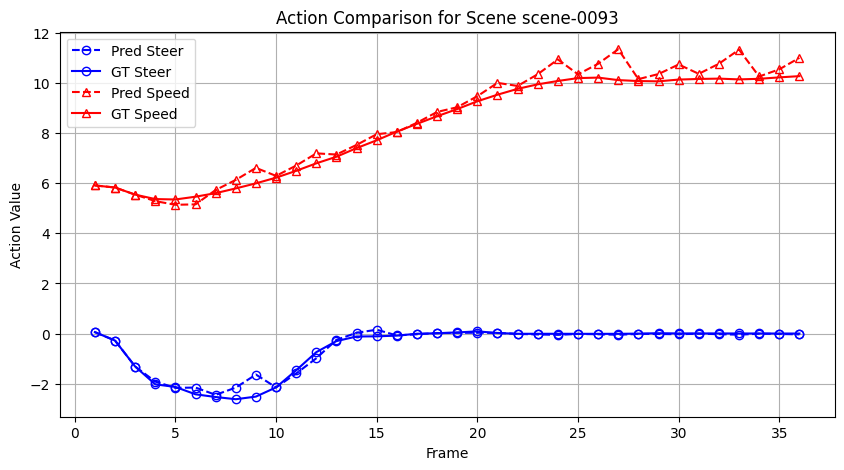

In [208]:
with open(r'C:\Users\wangxiaodong\Downloads\action_h8_ms16_ctx8_scope4_20k.json') as f:
    data = json.load(f)

plot_actions('scene-0093', data, history=3)

28 28 8


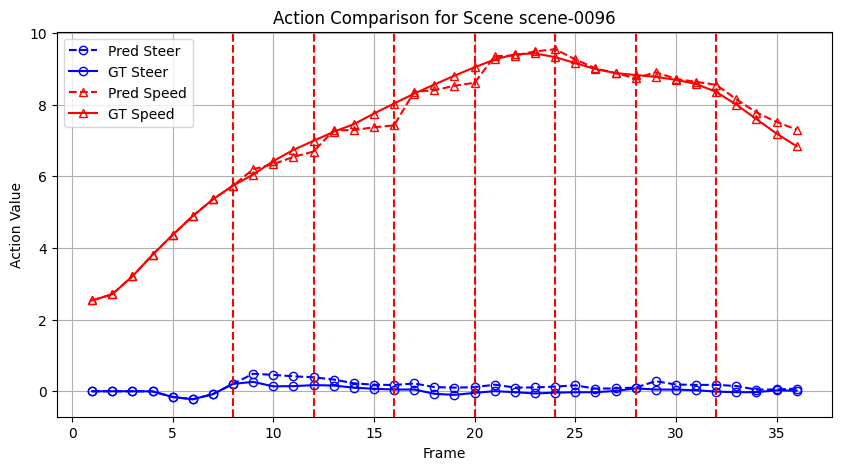

In [217]:
with open(r'C:\Users\wangxiaodong\Downloads\action_h8_ms16_4gram_10k.json') as f:
    data = json.load(f)

plot_actions('scene-0096', data, history=8)

28 28 8


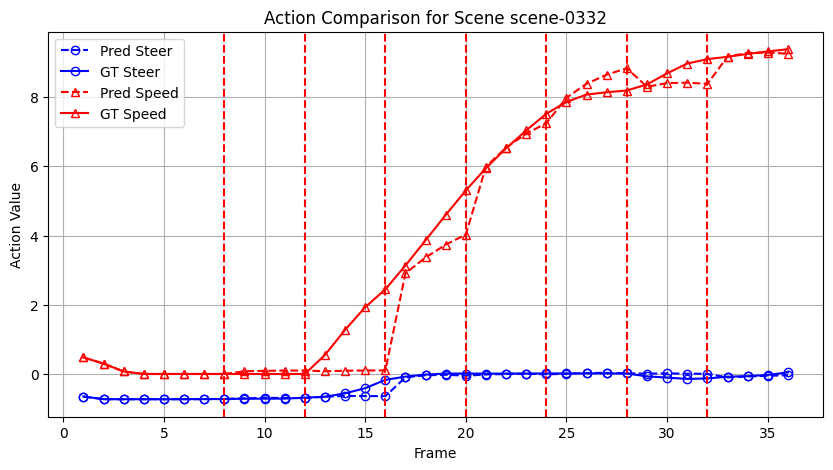

In [5]:
with open(r'C:\Users\wangxiaodong\Downloads\action_h8_ms16_4gram_20k.json') as f:
    data = json.load(f)

plot_actions('scene-0332', data, history=8)

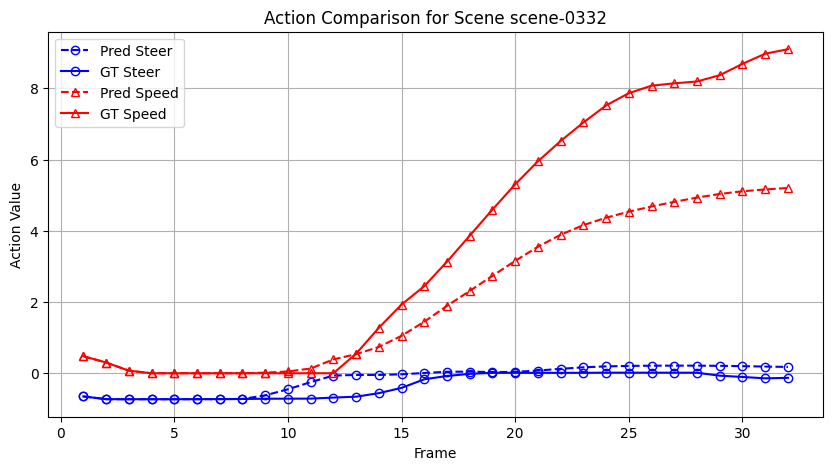

In [119]:
# Test scene 0332
with open(r'C:\Users\wangxiaodong\Downloads\action_eval_llama_1.5k.json') as f:
    data = json.load(f)

plot_actions('scene-0332', data)

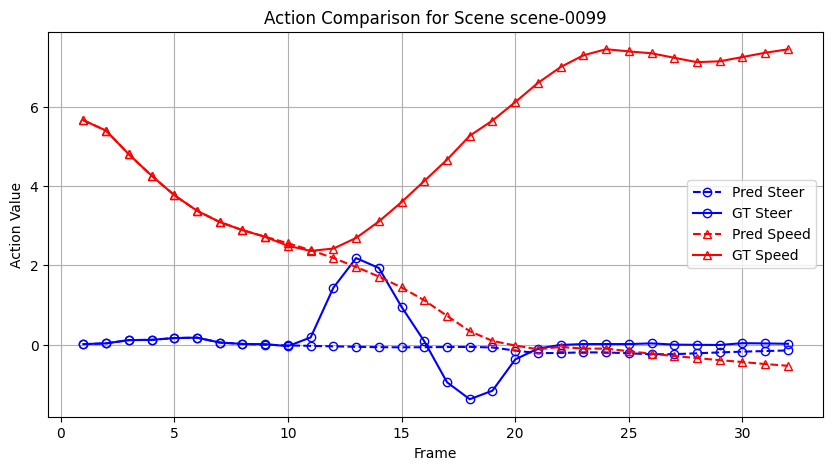

In [63]:
with open(r'C:\Users\wangxiaodong\Downloads\action_eval_llama_1k.json') as f:
    data = json.load(f)

plot_actions('scene-0099', data)

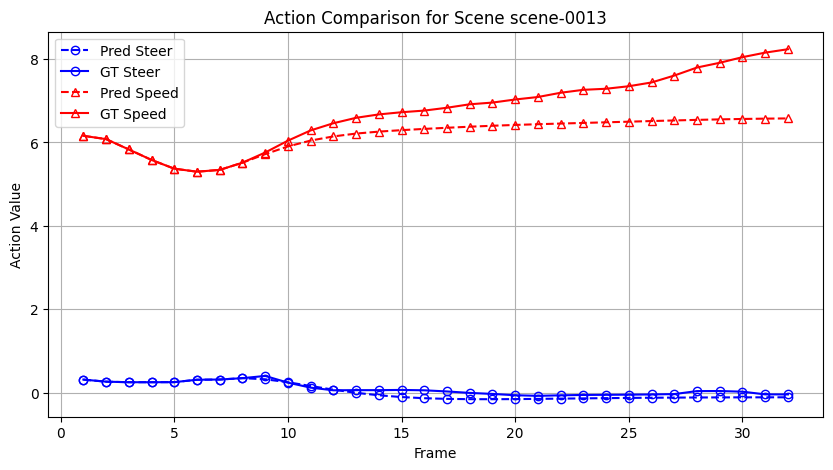

In [68]:
with open(r'C:\Users\wangxiaodong\Downloads\action_eval_llama_1k.json') as f:
    data = json.load(f)

plot_actions('scene-0013', data)

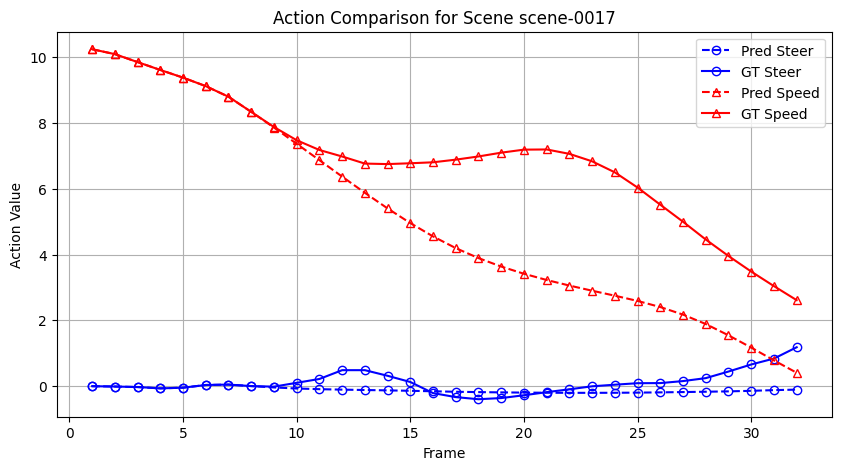

In [71]:
with open(r'C:\Users\wangxiaodong\Downloads\action_eval_llama_1k.json') as f:
    data = json.load(f)

plot_actions('scene-0017', data)

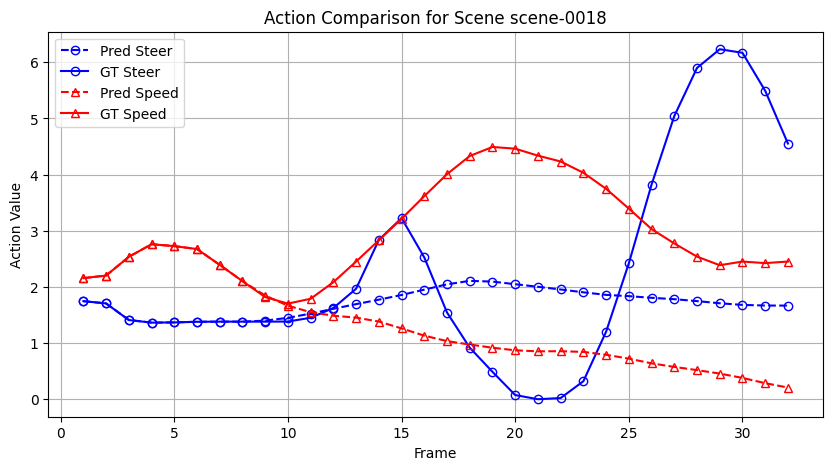

In [72]:
with open(r'C:\Users\wangxiaodong\Downloads\action_eval_llama_1k.json') as f:
    data = json.load(f)

plot_actions('scene-0018', data)

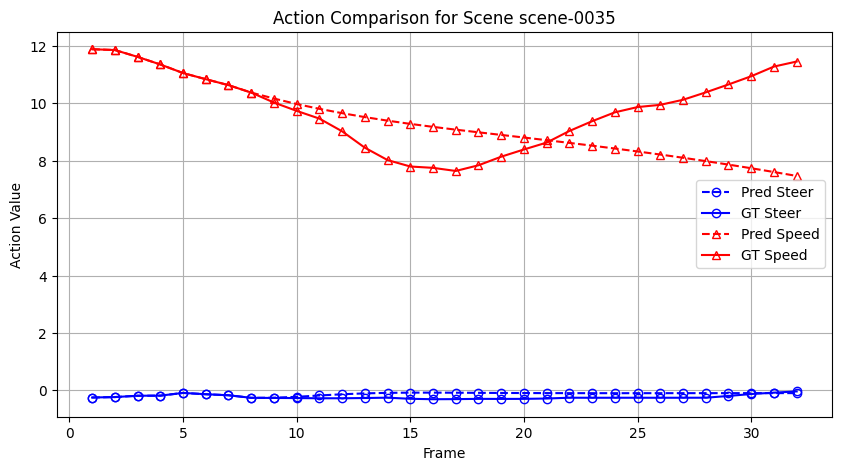

In [73]:
with open(r'C:\Users\wangxiaodong\Downloads\action_eval_llama_1k.json') as f:
    data = json.load(f)

plot_actions('scene-0035', data)

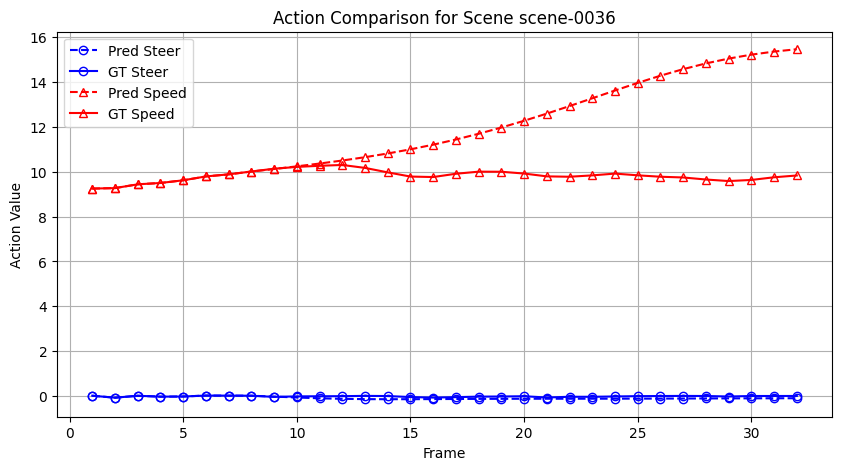

In [74]:
with open(r'C:\Users\wangxiaodong\Downloads\action_eval_llama_1k.json') as f:
    data = json.load(f)

plot_actions('scene-0036', data)

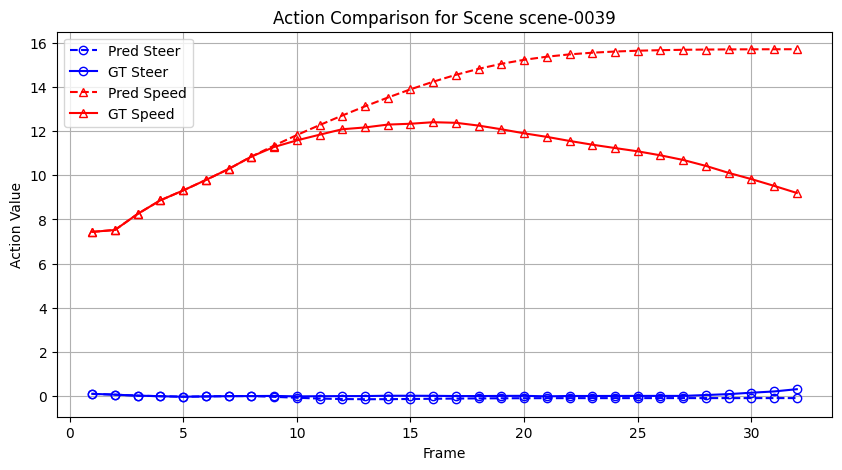

In [76]:
with open(r'C:\Users\wangxiaodong\Downloads\action_eval_llama_1k.json') as f:
    data = json.load(f)
plot_actions('scene-0039', data)

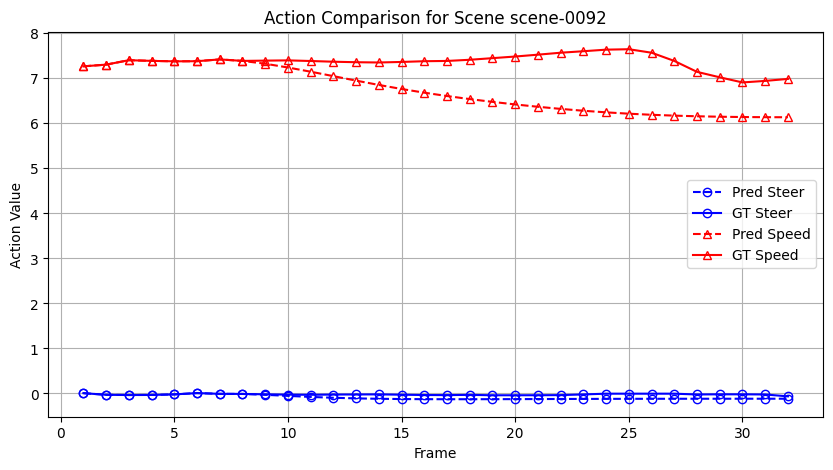

In [77]:
with open(r'C:\Users\wangxiaodong\Downloads\action_eval_llama_1k.json') as f:
    data = json.load(f)

plot_actions('scene-0092', data)

In [ ]:
with open(r'C:\Users\wangxiaodong\Downloads\action_eval_llama_1.5k.json') as f:
    data = json.load(f)

plot_actions('scene-0093', data)

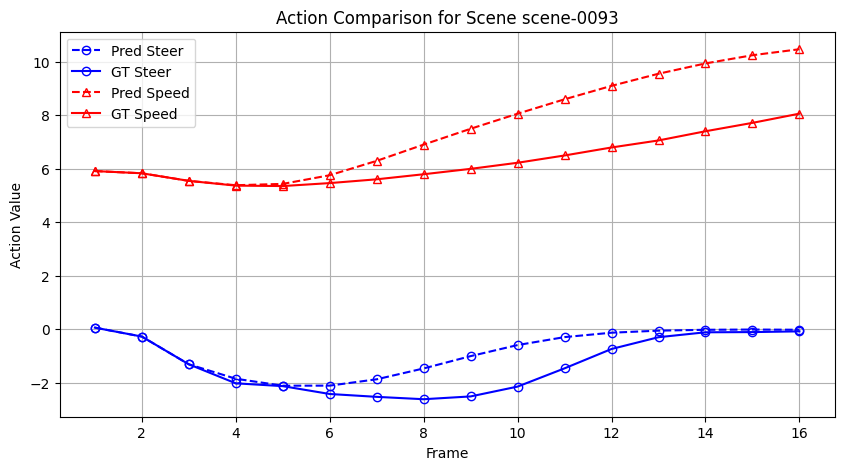

In [147]:
with open(r'C:\Users\wangxiaodong\Downloads\action_eval_llama_ctx3_15k.json') as f:
    data = json.load(f)
plot_actions('scene-0093', data)

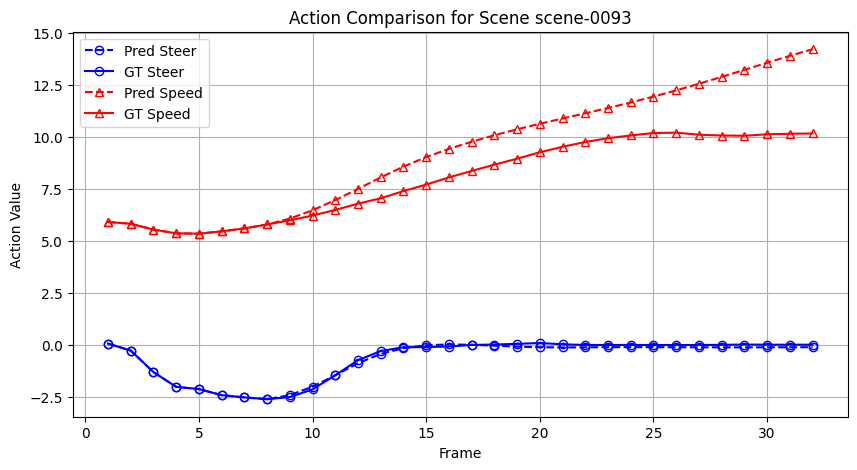

In [120]:
with open(r'C:\Users\wangxiaodong\Downloads\action_eval_llama_1k.json') as f:
    data = json.load(f)

plot_actions('scene-0093', data)

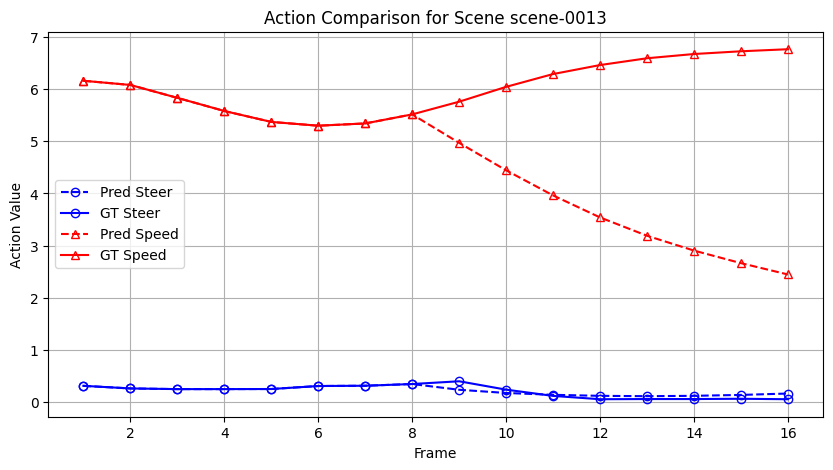

In [69]:
with open(r'C:\Users\wangxiaodong\Downloads\action_ViT.json') as f:
    data = json.load(f)

plot_actions('scene-0013', data)

In [65]:
with open(r'C:\Users\wangxiaodong\Downloads\action_ViT.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_hat = np.array(item['action_pred'])
    action_gt = np.array(item['action_gt'])
    l1_steers_dis.append(np.abs(action_hat[:8, 0] - action_gt[:8, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:8, 1] - action_gt[:8, 1]))

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')

l1 steer: 0.4222913748493496
l1 speed: 1.9487800946338878
avg dis: 1.1855357347416187


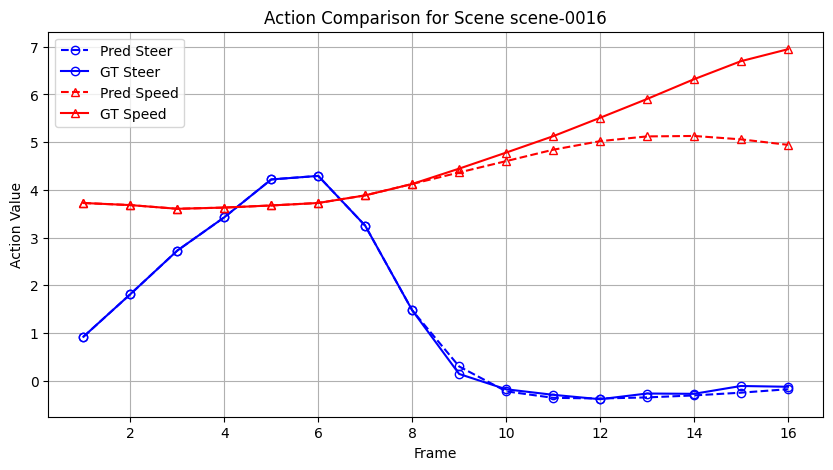

In [15]:
with open(r'C:\Users\wangxiaodong\Downloads\action_pure_5k.json') as f:
    data = json.load(f)

plot_actions('scene-0016', data)

In [19]:
with open(r'C:\Users\wangxiaodong\Downloads\action_pure_5k.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_hat = np.array(item['action_pred'])
    action_gt = np.array(item['action_gt'])
    l1_steers_dis.append(np.abs(action_hat[:, 0] - action_gt[:, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:, 1] - action_gt[:, 1]))

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')

l1 steer: 0.3493868929652308
l1 speed: 0.7244625170528404
avg dis: 0.5369247050090356


In [21]:
with open(r'C:\Users\wangxiaodong\Downloads\action_ms.json') as f:
    data = json.load(f)

l1_steers_dis = []
l1_speeds_dis = []
i = 0

for item in data:
    action_hat = np.array(item['action_hat'])
    action_gt = np.array(item['action_gt'])
    l1_steers_dis.append(np.abs(action_hat[:, 0] - action_gt[:, 0]))
    l1_speeds_dis.append(np.abs(action_hat[:, 1] - action_gt[:, 1]))

m1 = np.array(l1_steers_dis).mean()
m2 = np.array(l1_speeds_dis).mean()
print(f'l1 steer: {m1}')
print(f'l1 speed: {m2}')
print(f'avg dis: {(m1+m2)/2}')

l1 steer: 0.3631609706204229
l1 speed: 0.7734809695873022
avg dis: 0.5683209701038625


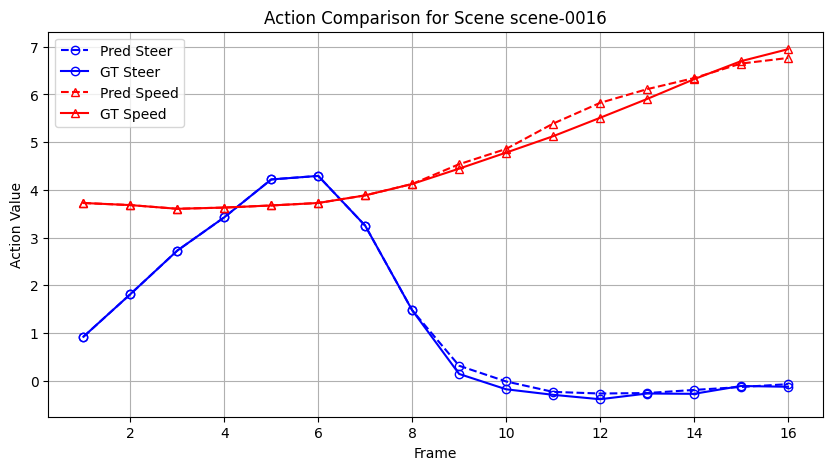

In [16]:
with open(r'C:\Users\wangxiaodong\Downloads\action_ms.json') as f:
    data = json.load(f)

plot_actions_1('scene-0016', data)

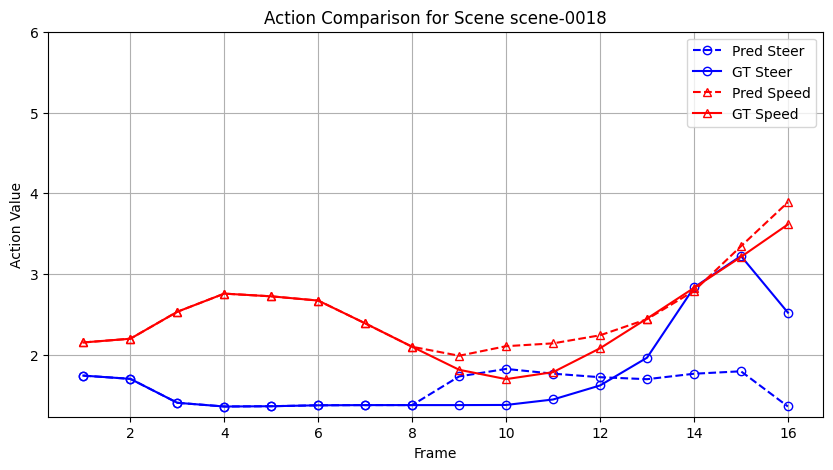

In [39]:
with open(r'C:\Users\wangxiaodong\Downloads\wm-v1-5e-5-fp16-checkpoint-4000-1.0-1.0-step25-debug\action.json') as f:
    data = json.load(f)

plot_actions('scene-0018', data)

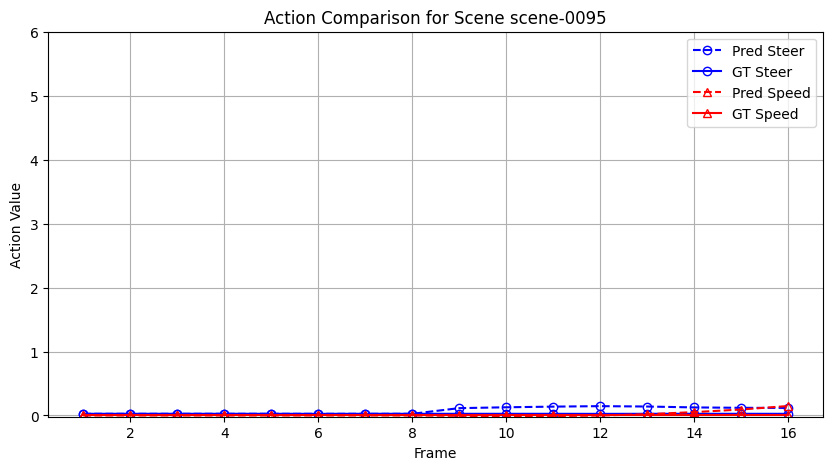

In [37]:
with open(r'C:\Users\wangxiaodong\Downloads\wm-v1-5e-5-fp16-checkpoint-4000-1.0-1.0-step25-debug\action.json') as f:
    data = json.load(f)

plot_actions('scene-0095', data)

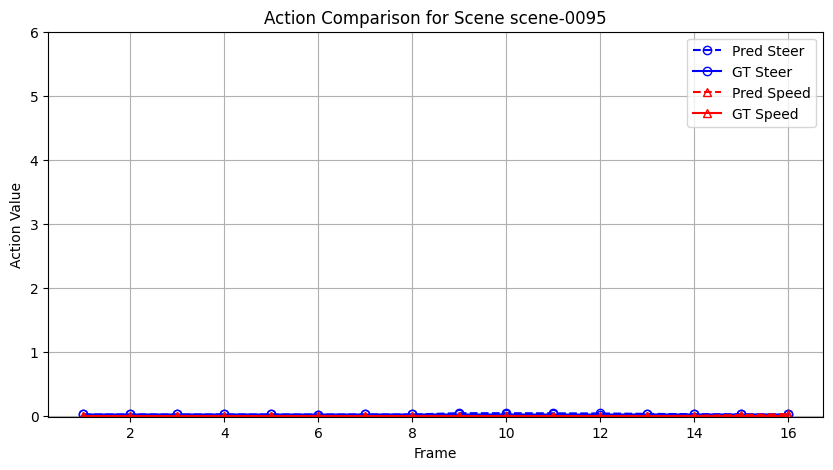

In [40]:
with open(r'C:\Users\wangxiaodong\Downloads\wm-v1-5e-5-fp16-checkpoint-5000-1.0-1.0-step25-debug\action.json') as f:
    data = json.load(f)

plot_actions('scene-0095', data)

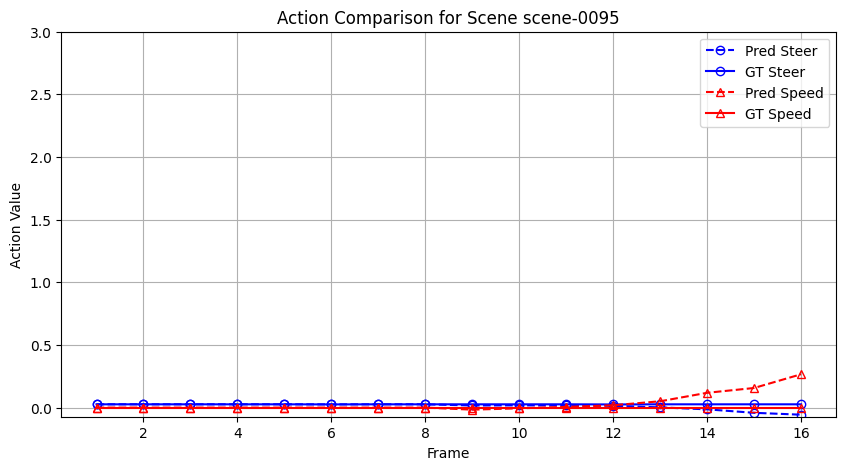

In [82]:
with open(r'C:\Users\wangxiaodong\Downloads\action_ms.json') as f:
    data = json.load(f)

plot_actions('scene-0095', data)

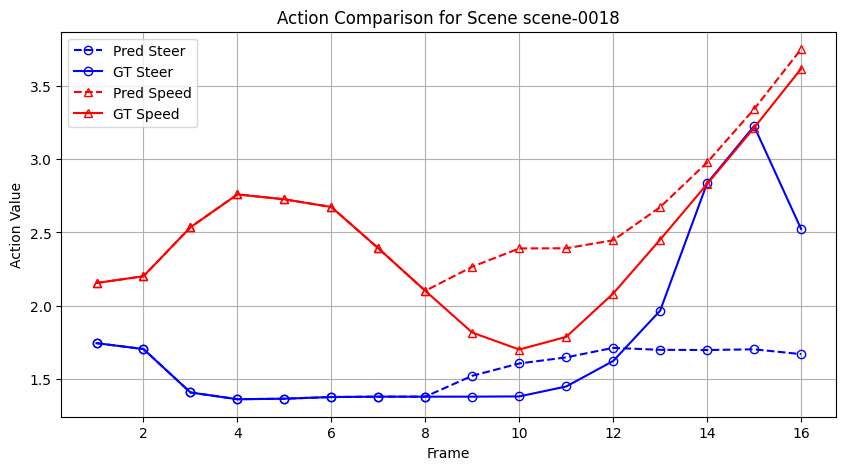

In [76]:
with open(r'C:\Users\wangxiaodong\Downloads\action_ms.json') as f:
    data = json.load(f)

plot_actions('scene-0018', data)

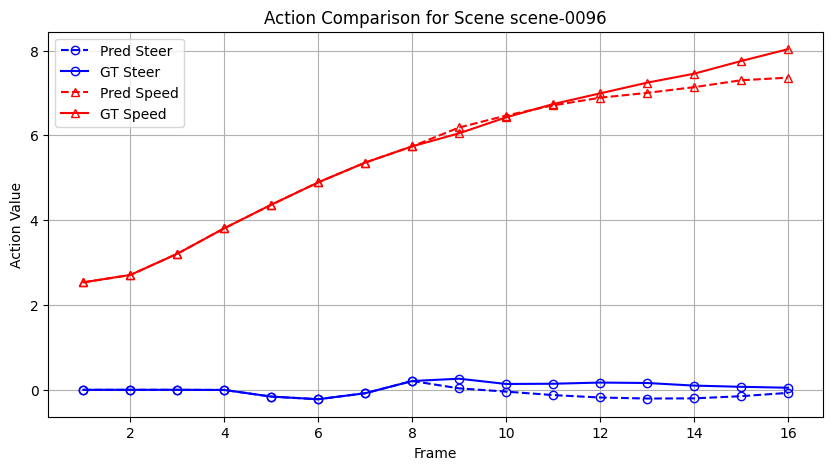

In [77]:
with open(r'C:\Users\wangxiaodong\Downloads\action_ms.json') as f:
    data = json.load(f)

plot_actions('scene-0096', data)

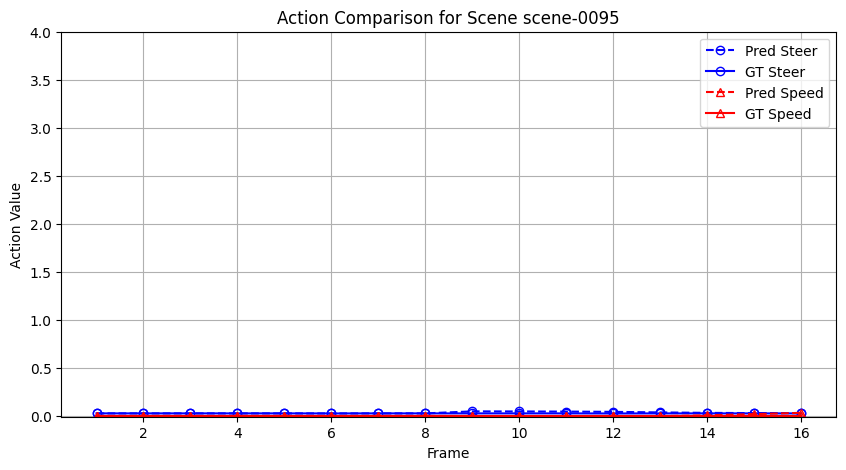

In [80]:
with open(r'C:\Users\wangxiaodong\Downloads\wm-v1-5e-5-fp16-checkpoint-5000-1.0-1.0-step25-debug\action.json') as f:
    data = json.load(f)

plot_actions('scene-0095', data)

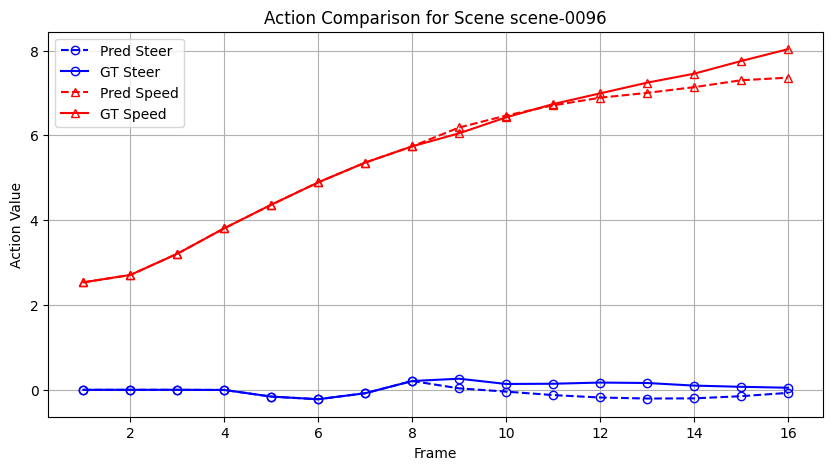

In [3]:
with open(r'C:\Users\wangxiaodong\Downloads\action_ms.json') as f:
    data = json.load(f)

plot_actions('scene-0096', data)

## 统计L1距离

In [50]:
with open(r'C:\Users\wangxiaodong\Downloads\wm-v1-5e-5-fp16-checkpoint-5000-1.0-1.0-step25-debug\action.json') as f:
    data = json.load(f)

l1_steer_sum = 0
l1_speed_sum = 0
for item in data:
    action_hat = np.array(item['action_hat'])
    action_gt = np.array(item['action_gt'])
    # action_his = np.array(entry['action_his'])
    l1_steer = np.abs(action_hat[:, 0] - action_gt[:, 0]).mean()
    l1_speed = np.abs(action_hat[:, 1] - action_gt[:, 1]).mean()
    l1_steer_sum += l1_steer
    l1_speed_sum += l1_speed
print(f'l1 steer: {l1_steer_sum/len(data)}')
print(f'l1 speed: {l1_speed_sum/len(data)}')

l1 steer: 0.3626030518305561
l1 speed: 0.7713130021176766


In [13]:
with open(r'C:\Users\wangxiaodong\Downloads\action_ms.json') as f:
    data = json.load(f)

l1_steer_sum = 0
l1_speed_sum = 0
for item in data:
    action_hat = np.array(item['action_hat'])
    action_gt = np.array(item['action_gt'])
    # action_his = np.array(entry['action_his'])
    l1_steer = np.abs(action_hat[:, 0] - action_gt[:, 0]).mean()
    l1_speed = np.abs(action_hat[:, 1] - action_gt[:, 1]).mean()
    l1_steer_sum += l1_steer
    l1_speed_sum += l1_speed
print(f'l1 steer: {l1_steer_sum/len(data)}')
print(f'l1 speed: {l1_speed_sum/len(data)}')

l1 steer: 0.3631609706204229
l1 speed: 0.7734809695873022


In [18]:
with open(r'C:\Users\wangxiaodong\Downloads\action.json') as f:
    data = json.load(f)

l1_steer_sum = 0
l1_speed_sum = 0
for item in data:
    action_hat = np.array(item['action_pred'])
    action_gt = np.array(item['action_gt'])
    # action_his = np.array(entry['action_his'])
    l1_steer = np.abs(action_hat[:, 0] - action_gt[:, 0]).mean()
    l1_speed = np.abs(action_hat[:, 1] - action_gt[:, 1]).mean()
    l1_steer_sum += l1_steer
    l1_speed_sum += l1_speed
print(f'l1 steer: {l1_steer_sum/len(data)}')
print(f'l1 speed: {l1_speed_sum/len(data)}')

l1 steer: 0.3430122911330788
l1 speed: 0.2843780462267265


In [51]:
with open(r'C:\Users\wangxiaodong\Downloads\action_fix_2k.json') as f:
    data = json.load(f)

l1_steer_sum = 0
l1_speed_sum = 0
for item in data:
    action_hat = np.array(item['action_hat'])
    action_gt = np.array(item['action_gt'])
    # action_his = np.array(entry['action_his'])
    l1_steer = np.abs(action_hat[:, 0] - action_gt[:, 0]).mean()
    l1_speed = np.abs(action_hat[:, 1] - action_gt[:, 1]).mean()
    l1_steer_sum += l1_steer
    l1_speed_sum += l1_speed
print(f'l1 steer: {l1_steer_sum/len(data)}')
print(f'l1 speed: {l1_speed_sum/len(data)}')

l1 steer: 0.38577068460378844
l1 speed: 0.8065132155878625


In [2]:
with open(r'C:\Users\wangxiaodong\Downloads\wm-v1-5e-5-fix-checkpoint-5000-1.0-1.0-step25-debug\action.json') as f:
    data = json.load(f)

l1_steer_sum = 0
l1_speed_sum = 0
for item in data:
    action_hat = np.array(item['action_hat'])
    action_gt = np.array(item['action_gt'])
    # action_his = np.array(entry['action_his'])
    l1_steer = np.abs(action_hat[:, 0] - action_gt[:, 0]).mean()
    l1_speed = np.abs(action_hat[:, 1] - action_gt[:, 1]).mean()
    l1_steer_sum += l1_steer
    l1_speed_sum += l1_speed
print(f'l1 steer: {l1_steer_sum/len(data)}')
print(f'l1 speed: {l1_speed_sum/len(data)}')

l1 steer: 0.4051972690779197
l1 speed: 0.8432719109071574


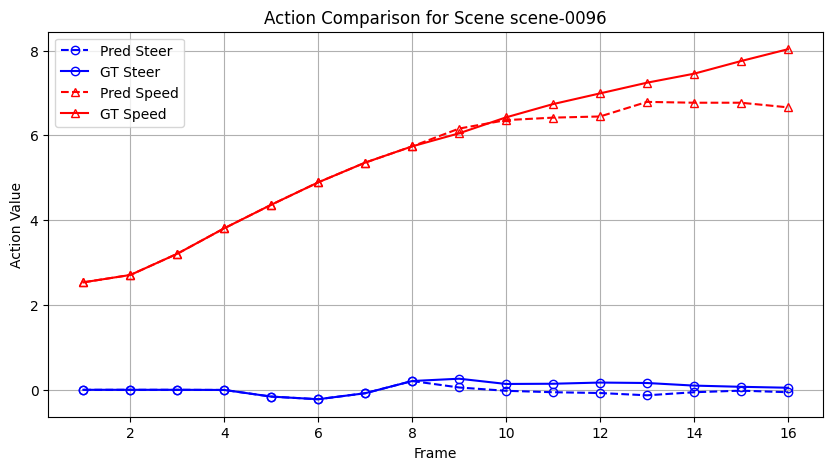

In [4]:
with open(r'C:\Users\wangxiaodong\Downloads\wm-v1-5e-5-fix-checkpoint-5000-1.0-1.0-step25-debug\action.json') as f:
    data = json.load(f)

plot_actions('scene-0096', data)

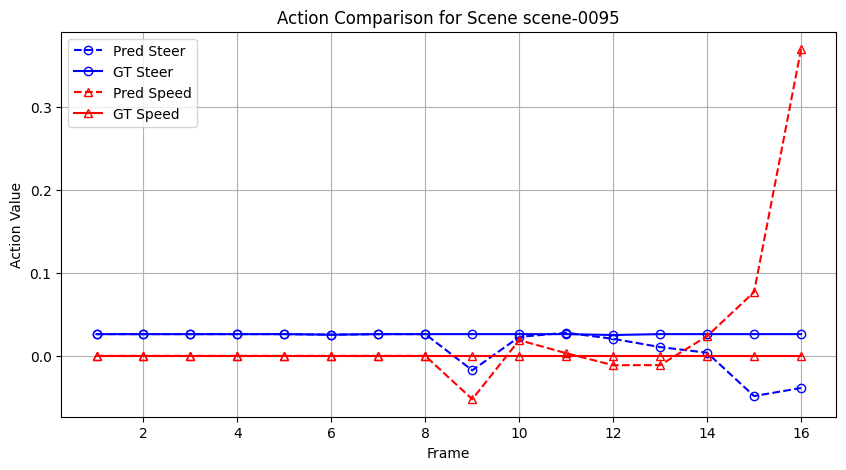

In [12]:
with open(r'C:\Users\wangxiaodong\Downloads\wm-v1-5e-5-fix-checkpoint-5000-1.0-1.0-step25-debug\action.json') as f:
    data = json.load(f)

plot_actions('scene-0095', data)
# 这个生成的视频展示的有差异，因为视频最后几帧仍然是有向前移动的

In [9]:
with open(r'C:\Users\wangxiaodong\Downloads\wm-v1-5e-5_w_action_grad-checkpoint-5000-1.0-1.0-step25-debug\action.json') as f:
    data = json.load(f)

l1_steer_sum = 0
l1_speed_sum = 0
for item in data:
    action_hat = np.array(item['action_hat'])
    action_gt = np.array(item['action_gt'])
    # action_his = np.array(entry['action_his'])
    l1_steer = np.abs(action_hat[:, 0] - action_gt[:, 0]).mean()
    l1_speed = np.abs(action_hat[:, 1] - action_gt[:, 1]).mean()
    l1_steer_sum += l1_steer
    l1_speed_sum += l1_speed
print(f'l1 steer: {l1_steer_sum/len(data)}')
print(f'l1 speed: {l1_speed_sum/len(data)}')

l1 steer: 0.4046934684447236
l1 speed: 0.9413324466336053


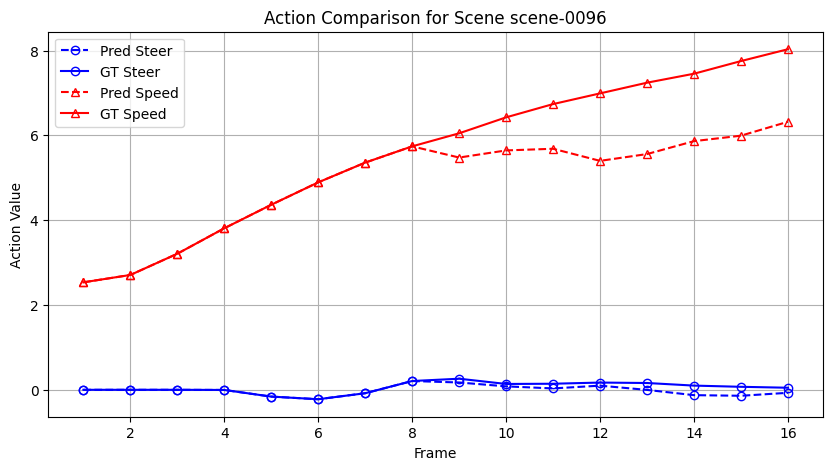

In [10]:
with open(r'C:\Users\wangxiaodong\Downloads\wm-v1-5e-5_w_action_grad-checkpoint-5000-1.0-1.0-step25-debug\action.json') as f:
    data = json.load(f)

plot_actions('scene-0096', data)

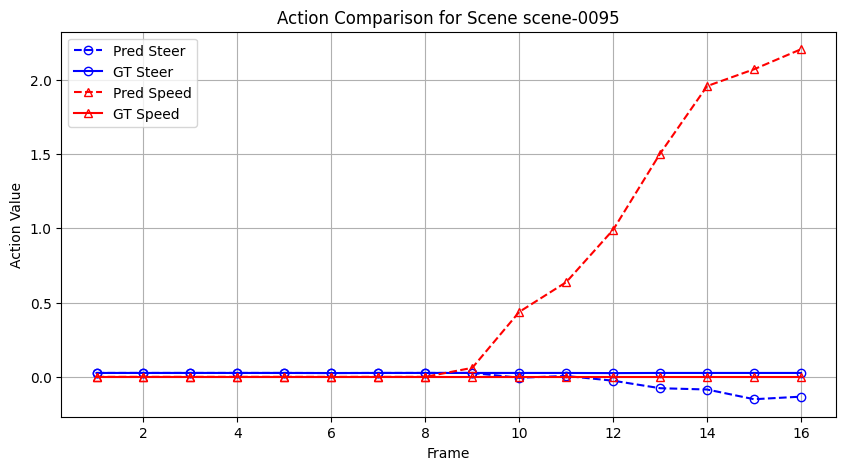

In [25]:
with open(r'C:\Users\wangxiaodong\Downloads\wm-v1-5e-5_w_action_grad-checkpoint-5000-1.0-1.0-step25-debug\action.json') as f:
    data = json.load(f)

plot_actions('scene-0095', data)

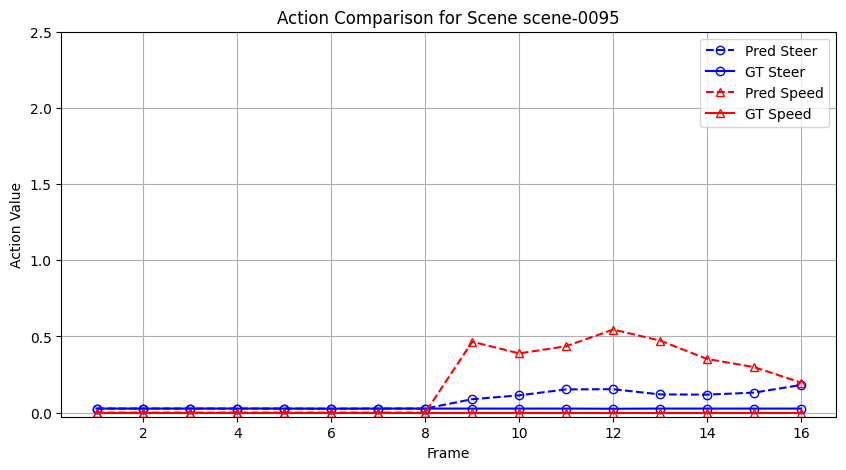

In [31]:
with open(r'C:\Users\wangxiaodong\Downloads\wm-v1-5e-5_w_action_grad-checkpoint-5000-1.0-3-step25-debug\action.json') as f:
    data = json.load(f)

plot_actions('scene-0095', data)

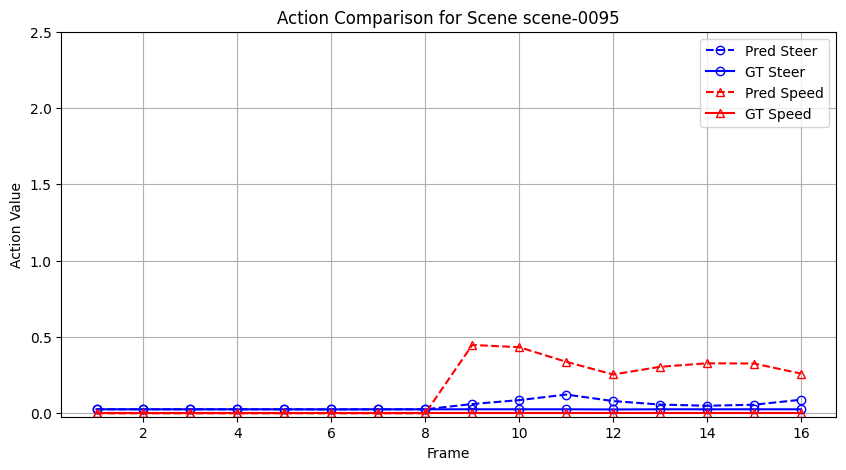

In [32]:
with open(r'C:\Users\wangxiaodong\Downloads\wm-v1-5e-5_w_action_grad-checkpoint-5000-1.0-3-step25-debug-run1\action.json') as f:
    data = json.load(f)

plot_actions('scene-0095', data)

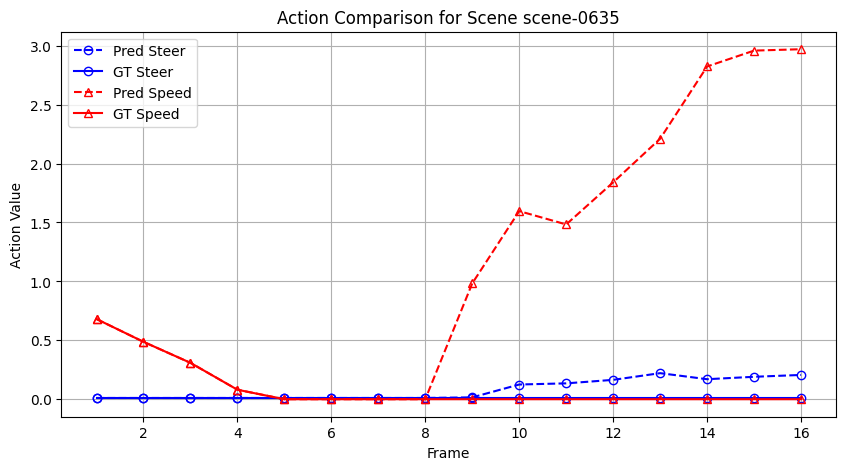

In [75]:
with open(r'C:\Users\wangxiaodong\Downloads\wm-v1-5e-5_w_action_grad-checkpoint-5000-1.0-3-step25-debug\action.json') as f:
    data = json.load(f)

plot_actions('scene-0635', data)

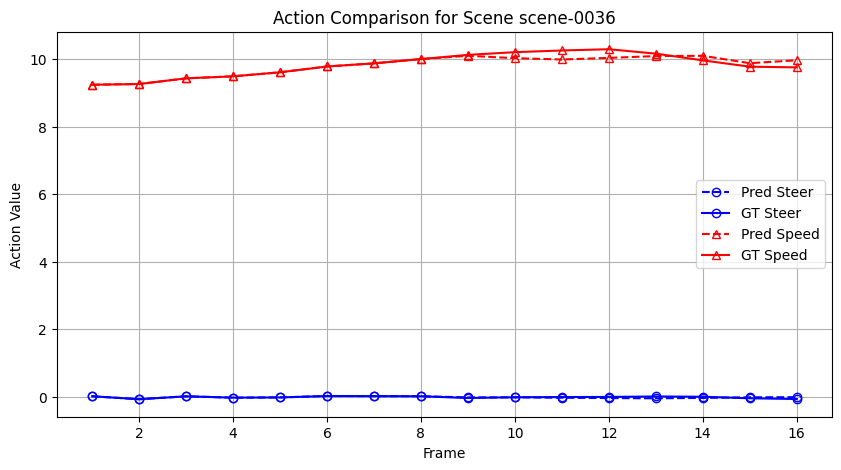

In [44]:
with open(r'C:\Users\wangxiaodong\Downloads\wm-v1-5e-5_w_action_grad-checkpoint-5000-1.0-3-step25-debug-run1\action.json') as f:
    data = json.load(f)

plot_actions('scene-0036', data)

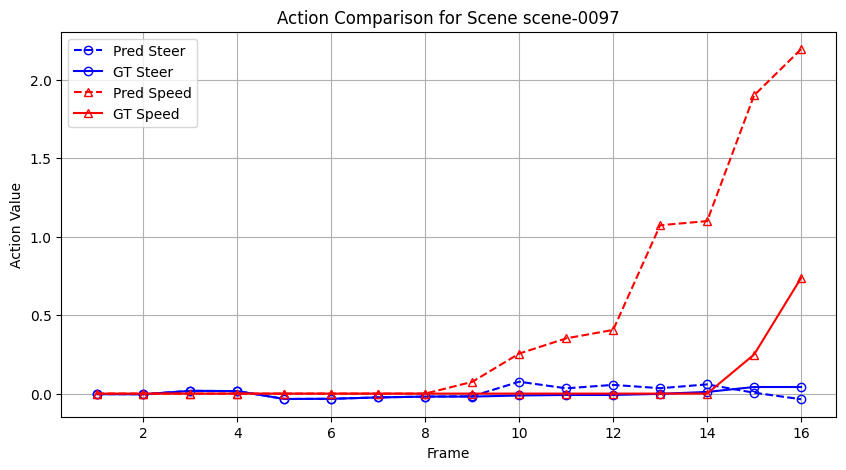

In [17]:
with open(r'C:\Users\wangxiaodong\Downloads\wm-v1-5e-5_w_action_grad-checkpoint-5000-1.0-1.0-step25-debug\action.json') as f:
    data = json.load(f)

plot_actions('scene-0097', data)

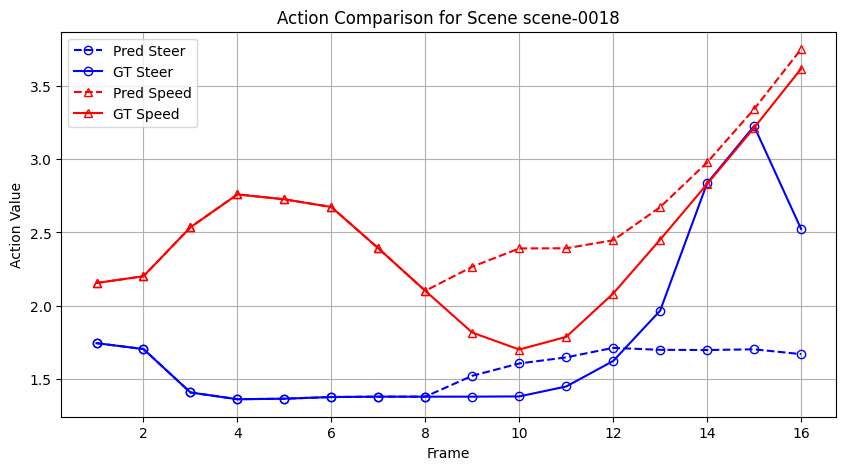

In [3]:
with open(r'C:\Users\wangxiaodong\Downloads\action_ms.json') as f:
    data = json.load(f)

plot_actions('scene-0018', data)

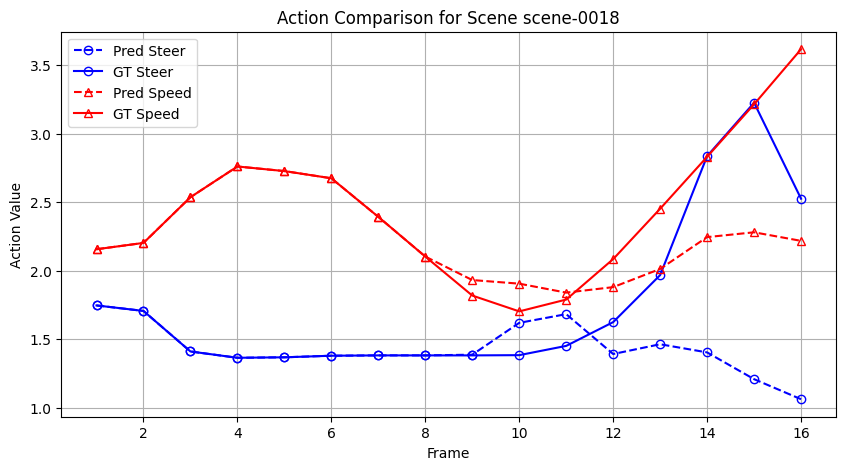

In [2]:
with open(r'C:\Users\wangxiaodong\Downloads\wm-coarse-5e-5-checkpoint-4000-1.0-3-step25-debug\action.json') as f:
    data = json.load(f)

plot_actions('scene-0018', data)

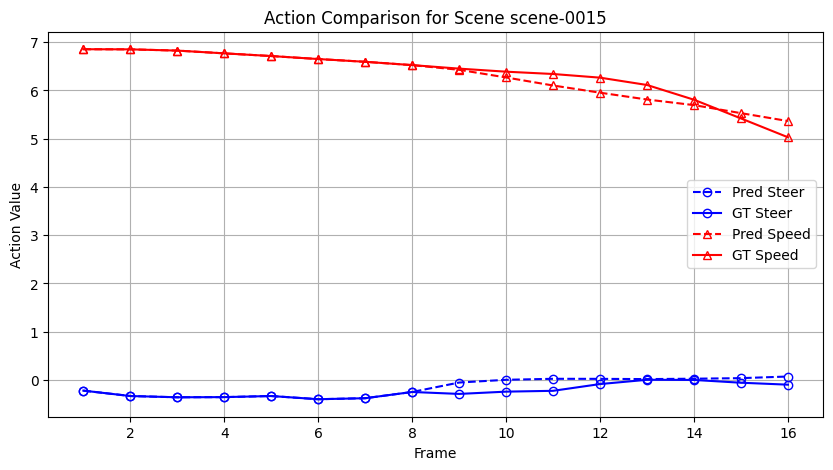

In [10]:
with open(r'C:\Users\wangxiaodong\Downloads\action_ms.json') as f:
    data = json.load(f)

plot_actions('scene-0015', data)

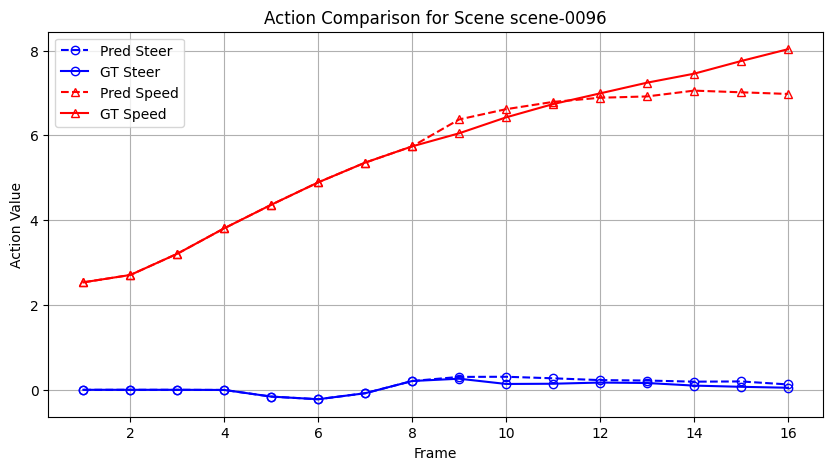

In [26]:
with open(r'C:\Users\wangxiaodong\Downloads\wm-coarse-5e-5-checkpoint-4000-1.0-3-step25-debug\action.json') as f:
    data = json.load(f)

plot_actions('scene-0096', data)

In [92]:
with open(r'C:\Users\wangxiaodong\Downloads\action_ms.json') as f:
    data = json.load(f)

l1_steer_sum = 0
l1_speed_sum = 0
for item in data:
    action_hat = np.array(item['action_hat'])
    action_gt = np.array(item['action_gt'])
    # action_his = np.array(entry['action_his'])
    l1_steer = np.abs(action_hat[:, 0] - action_gt[:, 0]).mean()
    l1_speed = np.abs(action_hat[:, 1]*3.6 - action_gt[:, 1]*3.6).mean()
    l1_steer_sum += l1_steer
    l1_speed_sum += l1_speed
print(f'l1 steer: {l1_steer_sum/len(data)}')
print(f'l1 speed: {l1_speed_sum/len(data)}')

l1 steer: 0.3631609706204229
l1 speed: 2.784531490514288


In [39]:
# less items
with open(r'C:\Users\wangxiaodong\Downloads\action_coarse_5k.json') as f:
    data = json.load(f)

l1_steer_sum = 0
l1_speed_sum = 0
for item in tqdm(data):
    action_hat = np.array(item['action_hat'])
    action_gt = np.array(item['action_gt'])
    # action_his = np.array(entry['action_his'])
    l1_steer = np.abs(action_hat[:, 0] - action_gt[:, 0]).mean()
    l1_speed = np.abs(action_hat[:, 1] - action_gt[:, 1]).mean()
    l1_steer_sum += l1_steer
    l1_speed_sum += l1_speed

print(f'l1 steer: {l1_steer_sum/len(data)}')
print(f'l1 speed: {l1_speed_sum/len(data)}')

100%|█████████████████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 14471.77it/s]

l1 steer: 0.368760308155106
l1 speed: 0.8112797920766752


In [48]:
# less items
with open(r'C:\Users\wangxiaodong\Downloads\scene_action_file_train.json') as f:
    data = json.load(f)

angle = []
speed = []
for item in tqdm(data):
    angle.extend(item['angles'])
    speed.extend(item['speeds'])

import numpy as np
angle = np.array(angle)
speed = np.array(speed)

print(angle.mean(), angle.min(), angle.max())
print(speed.mean(), speed.min(), speed.max())

100%|████████████████████████████████████████████████████████████████████████████| 684/684 [00:00<00:00, 341902.51it/s]

-0.0555023319327245 -8.518880103472357 8.70570230894772
17.85582157135525 0.0 65.34763958218802


In [49]:
angle[:8]

array([2.73318561, 3.42282883, 3.60235958, 3.59346791, 3.27357776,
       1.60169953, 0.46578091, 0.0187217 ])

In [54]:
speed[:8]

array([14.74      , 14.72708678, 14.69571708, 15.29763912, 16.23352587,
       17.61328311, 18.798332  , 19.70561724])

In [50]:
def normalize_func(tensor, min_val=0, max_val=200):
    # normalize to [-1, 1]
    normalized_tensor = (tensor - min_val) / (max_val - min_val)
    normalized_tensor = normalized_tensor * 2 - 1
    return normalized_tensor

In [51]:
seek_steer_tgt = normalize_func(angle[:8], -9, 9)
seek_speed_tgt = normalize_func(speed[:8], 0, 70)

In [52]:
seek_steer_tgt

array([0.30368729, 0.38031431, 0.40026218, 0.39927421, 0.36373086,
       0.17796661, 0.05175343, 0.00208019])

In [60]:
seek_speed_tgt

array([-0.57885714, -0.57922609, -0.58012237, -0.5629246 , -0.53618498,
       -0.49676334, -0.4629048 , -0.43698236])

In [56]:
seek_steer_inp = np.round(angle[:8] * 10 + 90)
seek_speed_inp = np.round(speed[:8] * 10)

In [57]:
seek_steer_inp

array([117., 124., 126., 126., 123., 106.,  95.,  90.])

In [58]:
seek_speed_inp

array([147., 147., 147., 153., 162., 176., 188., 197.])

In [72]:
x = np.array((0.57, 0.52))

In [70]:
def denormalize_func(normalized_tensor, min_val=0, max_val=200):
    tensor = (normalized_tensor + 1) / 2
    tensor = tensor * (max_val - min_val) + min_val
    # tensor = t.round(tensor).long()
    return tensor

In [84]:
y = np.array((0.30, 0.32))

In [85]:
denormalize_func(y, -9, 9)

array([2.7 , 2.88])

In [87]:
# less items
with open(r'C:\Users\wangxiaodong\Downloads\action-vae-Attn-5e-5-checkpoint-6500-debug\action.json') as f:
    data = json.load(f)

l1_steer_sum = 0
l1_speed_sum = 0
for item in tqdm(data):
    action_hat = np.array(item['action_pred'])
    action_gt = np.array(item['action_gt'])
    # action_his = np.array(entry['action_his'])
    l1_steer = np.abs(action_hat[:, 0] - action_gt[:, 0]).mean()
    l1_speed = np.abs(action_hat[:, 1] - action_gt[:, 1]).mean()
    l1_steer_sum += l1_steer
    l1_speed_sum += l1_speed

print(f'l1 steer: {l1_steer_sum/len(data)}')
print(f'l1 speed: {l1_speed_sum/len(data)}')

100%|████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:00<?, ?it/s]

l1 steer: 0.5229600628217062
l1 speed: 4.051529893527428


In [96]:
4.051/3.6

1.1252777777777778

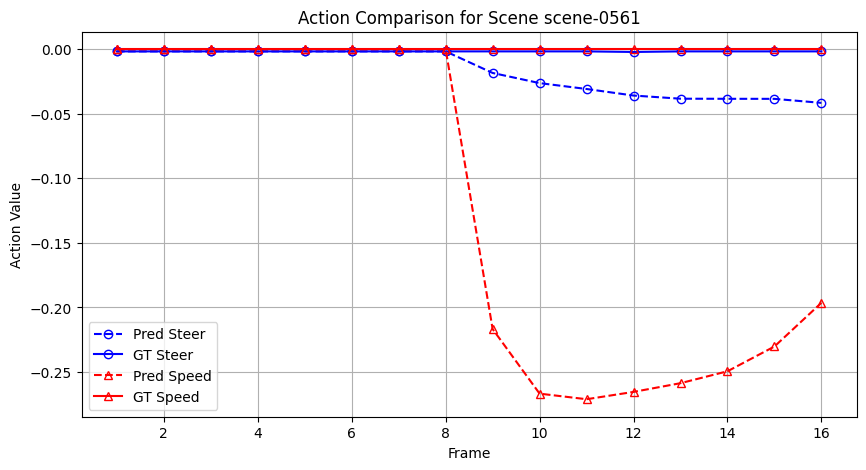

In [99]:
with open(r'C:\Users\wangxiaodong\Downloads\action-vae-Attn-5e-5-checkpoint-6500-debug\action.json') as f:
    data = json.load(f)

plot_actions('scene-0561', data)

In [147]:
import numpy as np
from PIL import Image

# 定义图像的宽度和高度
width, height = 512, 512

# 生成一个随机噪声数组
noise = np.random.randint(0, 256, (height, width), dtype=np.uint8)

# 将噪声数组转换为图像
image = Image.fromarray(noise, mode='L')

# 保存图像为PNG文件
image.save(r'C:\Users\wangxiaodong\Downloads\noise_image.png')

print('噪声图像已保存为 noise_image.png')


噪声图像已保存为 noise_image.png


In [150]:
import numpy as np
from PIL import Image

# 定义图像的宽度和高度
width, height = 512, 512

# 生成一个随机噪声数组
noise = np.random.randint(0, 256, (height, width), dtype=np.uint8)

# 将噪声数组转换为灰度图像
noise_image = Image.fromarray(noise, mode='L')

# 创建一个淡蓝色的纯色图像 (R=102, G=178, B=255, 对应于40%的蓝色)
blue_color = (102, 178, 255)
blue_image = Image.new('RGB', (width, height), blue_color)

# 混合噪声图像和蓝色图像
# 将噪声图像转换为RGB模式并扩展到3通道
noise_image_rgb = noise_image.convert('RGB')

# 混合比率
noise_ratio = 0.5
blue_ratio = 1 - noise_ratio

# 混合图像
mixed_image = Image.blend(blue_image, noise_image_rgb, noise_ratio)

# 保存混合后的图像为PNG文件
mixed_image.save(r'C:\Users\wangxiaodong\Downloads\mixed_noise_image.png')

print('混合噪声图像已保存为 mixed_noise_image.png')


混合噪声图像已保存为 mixed_noise_image.png
